# 이탈한 고객과 여러 관심도의 관계 

### mac 폰트 설정

In [44]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'AppleGothic'  # Mac 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 부호 깨짐 방지

## df 전처리 함수 불러오기 

In [1]:
# 전처리 파일 찾을 수 있게 폴더 위치 지정
import sys
import os

# 현재 실행 중인 디렉토리 확인
print("현재 디렉토리:", os.getcwd())

# package 폴더가 있는 경로 추가
sys.path.append(os.path.abspath("../../package"))

# 이제 import 가능!
from preprocessing.test_pipeline import preprocessing_customer_data


현재 디렉토리: /Users/choeminju/working/hk-projects/hk-toss-middle-project/notebooks/EDA


## 파일 불러오기

In [3]:
import pandas as pd

df_21 = pd.read_csv("/Users/choeminju/Desktop/중간프로젝트/202112_통신카드CB결합.csv")
df_22 = pd.read_csv("/Users/choeminju/Desktop/중간프로젝트/202212_통신카드CB결합.csv")

df = preprocessing_customer_data(df_21, df_22)

In [5]:
df

,BASE_YM,CUST_ID,SEX,AGE,JB_TP,HOME_ADM,COM_ADM,HIGHEND_CD1,HIGHEND_CD2,HIGHEND_CD3,...,YOY_R3M_ITRT_ENT_MUSIC_CS,YOY_R3M_ITRT_INFO_NEWS_CS,YOY_R3M_ITRT_INFO_BOOK_CS,YOY_R3M_ITRT_INFO_BLOG_CS,YOY_R3M_ITRT_INFO_PORTAL_CS,YOY_R3M_ITRT_COMM_SNS_CS,YOY_R3M_ITRT_COMM_VOIP_CS,YOY_R3M_ITRT_COMM_DATE_CS,YOY_R3M_ITRT_COMM_MESSENGER_CS,exited
0,202212,SYN_0,2,35,420,42,42.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,202212,SYN_1,2,50,910,41,11.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,202212,SYN_3,1,25,910,11,11.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,202212,SYN_4,2,40,420,47,47.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,202212,SYN_5,2,55,510,11,11.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329994,202212,SYN_329994,1,40,510,41,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
329995,202212,SYN_329995,1,55,510,11,11.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
329996,202212,SYN_329996,2,60,910,41,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
329998,202212,SYN_329998,2,45,420,29,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df["exited"].sum()

14908

## 관심도 df_interest 생성 및 EDA

In [19]:
# 불러올 컬럼 리스트
columns_to_interest = [
    "CUST_ID",  "R3M_ITRT_FIN_PAY", "R3M_ITRT_FIN_INSUR", "R3M_ITRT_FIN_COIN", "R3M_ITRT_FIN_BANK", "R3M_ITRT_FIN_ASSET",
    "R3M_ITRT_FIN_STOCK", "R3M_ITRT_LIFE_HEALTH", "R3M_ITRT_LIFE_DELIVERY", "R3M_ITRT_LIFE_HOUSE", "R3M_ITRT_LIFE_MOVE",
    "R3M_ITRT_LIFE_CAR", "R3M_ITRT_LIFE_KIDS", "R3M_ITRT_LIFE_BEAUTY", "R3M_ITRT_SHOP_MART", "R3M_ITRT_SHOP_SOCIAL",
    "R3M_ITRT_SHOP_OPEN", "R3M_ITRT_SHOP_BEAUTY", "R3M_ITRT_SHOP_JIKGU", "R3M_ITRT_LEISURE_SPORT", "R3M_ITRT_LEISURE_TRAVEL",
    "R3M_ITRT_LEISURE_HOTEL", "R3M_ITRT_ENT_SVOD", "R3M_ITRT_ENT_BROADCAST", "R3M_ITRT_ENT_RADIO", "R3M_ITRT_ENT_PIC",
    "R3M_ITRT_ENT_WEBTOON", "R3M_ITRT_ENT_MUSIC", "R3M_ITRT_INFO_NEWS", "R3M_ITRT_INFO_BOOK", "R3M_ITRT_INFO_BLOG",
    "R3M_ITRT_INFO_PORTAL", "R3M_ITRT_COMM_SNS", "R3M_ITRT_COMM_VOIP", "R3M_ITRT_COMM_DATE", "R3M_ITRT_COMM_MESSENGER", "exited"
]

# df에서 CUST_ID, 관심도, exited 컬럼 선택해서 새 데이터프레임에 저장
df_interest = df[columns_to_interest]

# 확인
df_interest


,CUST_ID,R3M_ITRT_FIN_PAY,R3M_ITRT_FIN_INSUR,R3M_ITRT_FIN_COIN,R3M_ITRT_FIN_BANK,R3M_ITRT_FIN_ASSET,R3M_ITRT_FIN_STOCK,R3M_ITRT_LIFE_HEALTH,R3M_ITRT_LIFE_DELIVERY,R3M_ITRT_LIFE_HOUSE,...,R3M_ITRT_ENT_MUSIC,R3M_ITRT_INFO_NEWS,R3M_ITRT_INFO_BOOK,R3M_ITRT_INFO_BLOG,R3M_ITRT_INFO_PORTAL,R3M_ITRT_COMM_SNS,R3M_ITRT_COMM_VOIP,R3M_ITRT_COMM_DATE,R3M_ITRT_COMM_MESSENGER,exited
0,SYN_0,1,1,1,1,0,1,1,1,0,...,1,1,0,1,2,1,1,0,2,0
1,SYN_1,1,0,0,1,0,1,1,1,1,...,1,1,0,1,2,1,1,0,1,0
3,SYN_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SYN_4,1,1,1,2,1,1,1,2,1,...,1,1,1,2,2,2,1,0,2,0
5,SYN_5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329994,SYN_329994,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
329995,SYN_329995,1,0,0,2,0,0,0,0,0,...,1,1,1,1,2,1,1,0,1,0
329996,SYN_329996,1,1,0,1,0,0,1,1,0,...,1,1,0,1,2,1,1,0,1,0
329998,SYN_329998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# nan값 확인 
df_interest.isna().sum()

CUST_ID                    0
R3M_ITRT_FIN_PAY           0
R3M_ITRT_FIN_INSUR         0
R3M_ITRT_FIN_COIN          0
R3M_ITRT_FIN_BANK          0
R3M_ITRT_FIN_ASSET         0
R3M_ITRT_FIN_STOCK         0
R3M_ITRT_LIFE_HEALTH       0
R3M_ITRT_LIFE_DELIVERY     0
R3M_ITRT_LIFE_HOUSE        0
R3M_ITRT_LIFE_MOVE         0
R3M_ITRT_LIFE_CAR          0
R3M_ITRT_LIFE_KIDS         0
R3M_ITRT_LIFE_BEAUTY       0
R3M_ITRT_SHOP_MART         0
R3M_ITRT_SHOP_SOCIAL       0
R3M_ITRT_SHOP_OPEN         0
R3M_ITRT_SHOP_BEAUTY       0
R3M_ITRT_SHOP_JIKGU        0
R3M_ITRT_LEISURE_SPORT     0
R3M_ITRT_LEISURE_TRAVEL    0
R3M_ITRT_LEISURE_HOTEL     0
R3M_ITRT_ENT_SVOD          0
R3M_ITRT_ENT_BROADCAST     0
R3M_ITRT_ENT_RADIO         0
R3M_ITRT_ENT_PIC           0
R3M_ITRT_ENT_WEBTOON       0
R3M_ITRT_ENT_MUSIC         0
R3M_ITRT_INFO_NEWS         0
R3M_ITRT_INFO_BOOK         0
R3M_ITRT_INFO_BLOG         0
R3M_ITRT_INFO_PORTAL       0
R3M_ITRT_COMM_SNS          0
R3M_ITRT_COMM_VOIP         0
R3M_ITRT_COMM_

In [23]:
df_interest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283945 entries, 0 to 329999
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   CUST_ID                  283945 non-null  object
 1   R3M_ITRT_FIN_PAY         283945 non-null  int64 
 2   R3M_ITRT_FIN_INSUR       283945 non-null  int64 
 3   R3M_ITRT_FIN_COIN        283945 non-null  int64 
 4   R3M_ITRT_FIN_BANK        283945 non-null  int64 
 5   R3M_ITRT_FIN_ASSET       283945 non-null  int64 
 6   R3M_ITRT_FIN_STOCK       283945 non-null  int64 
 7   R3M_ITRT_LIFE_HEALTH     283945 non-null  int64 
 8   R3M_ITRT_LIFE_DELIVERY   283945 non-null  int64 
 9   R3M_ITRT_LIFE_HOUSE      283945 non-null  int64 
 10  R3M_ITRT_LIFE_MOVE       283945 non-null  int64 
 11  R3M_ITRT_LIFE_CAR        283945 non-null  int64 
 12  R3M_ITRT_LIFE_KIDS       283945 non-null  int64 
 13  R3M_ITRT_LIFE_BEAUTY     283945 non-null  int64 
 14  R3M_ITRT_SHOP_MART       

In [29]:
import pandas as pd

# 연체 고객 수 확인
print(df_interest["exited"].value_counts())

# 관심도 컬럼들의 기본 통계 확인
print(df_interest.describe())


exited
0    269037
1     14908
Name: count, dtype: int64
       R3M_ITRT_FIN_PAY  R3M_ITRT_FIN_INSUR  R3M_ITRT_FIN_COIN  \
count     283945.000000       283945.000000      283945.000000   
mean           0.684752            0.485855           0.426245   
std            0.464615            0.499801           0.494531   
min            0.000000            0.000000           0.000000   
25%            0.000000            0.000000           0.000000   
50%            1.000000            0.000000           0.000000   
75%            1.000000            1.000000           1.000000   
max            1.000000            1.000000           1.000000   

       R3M_ITRT_FIN_BANK  R3M_ITRT_FIN_ASSET  R3M_ITRT_FIN_STOCK  \
count      283945.000000       283945.000000       283945.000000   
mean            0.780193            0.039560            0.386149   
std             0.584746            0.194925            0.486873   
min             0.000000            0.000000            0.000000   
25%     

In [31]:
# exited의 비율을 백분율(%)로 계산하는 코드
df_interest["exited"].value_counts(normalize=True) * 100

exited
0    94.749687
1     5.250313
Name: proportion, dtype: float64

In [37]:
# 이탈 여부에 따른 관심도 평균 비교 ( numeric_only -> CUST_ID 제외)
df_interest.groupby("exited").mean(numeric_only=True)

,R3M_ITRT_FIN_PAY,R3M_ITRT_FIN_INSUR,R3M_ITRT_FIN_COIN,R3M_ITRT_FIN_BANK,R3M_ITRT_FIN_ASSET,R3M_ITRT_FIN_STOCK,R3M_ITRT_LIFE_HEALTH,R3M_ITRT_LIFE_DELIVERY,R3M_ITRT_LIFE_HOUSE,R3M_ITRT_LIFE_MOVE,...,R3M_ITRT_ENT_WEBTOON,R3M_ITRT_ENT_MUSIC,R3M_ITRT_INFO_NEWS,R3M_ITRT_INFO_BOOK,R3M_ITRT_INFO_BLOG,R3M_ITRT_INFO_PORTAL,R3M_ITRT_COMM_SNS,R3M_ITRT_COMM_VOIP,R3M_ITRT_COMM_DATE,R3M_ITRT_COMM_MESSENGER
exited,,,,,,,,,,,,,,,,,,,,,
0,0.683426,0.484294,0.425001,0.778584,0.039244,0.383795,0.502098,0.578485,0.373874,0.064530,...,0.190851,0.779235,0.62274,0.445652,0.800626,1.355304,1.022960,0.651632,0.012864,1.219959
1,0.708680,0.514019,0.448685,0.809230,0.045278,0.428629,0.534545,0.602629,0.413939,0.071036,...,0.182989,0.807754,0.65334,0.468943,0.829622,1.399517,1.040381,0.674537,0.014623,1.261068


In [39]:
# 특정 관심도 (예: 금융결제 관심도) 기준으로 상위 30% vs 하위 30% 비교
threshold_high = df_interest["R3M_ITRT_FIN_PAY"].quantile(0.7)  # 상위 30% 기준값
threshold_low = df_interest["R3M_ITRT_FIN_PAY"].quantile(0.3)  # 하위 30% 기준값

# 상위 30% 고객군의 이탈율
high_interest_group = df_interest[df_interest["R3M_ITRT_FIN_PAY"] >= threshold_high]
low_interest_group = df_interest[df_interest["R3M_ITRT_FIN_PAY"] <= threshold_low]

print("🔹 금융결제 관심도 상위 30% 고객의 이탈율:", high_interest_group["exited"].mean())
print("🔹 금융결제 관심도 하위 30% 고객의 이탈율:", low_interest_group["exited"].mean())


🔹 금융결제 관심도 상위 30% 고객의 이탈율: 0.054337763331138905
🔹 금융결제 관심도 하위 30% 고객의 이탈율: 0.04851809234412879


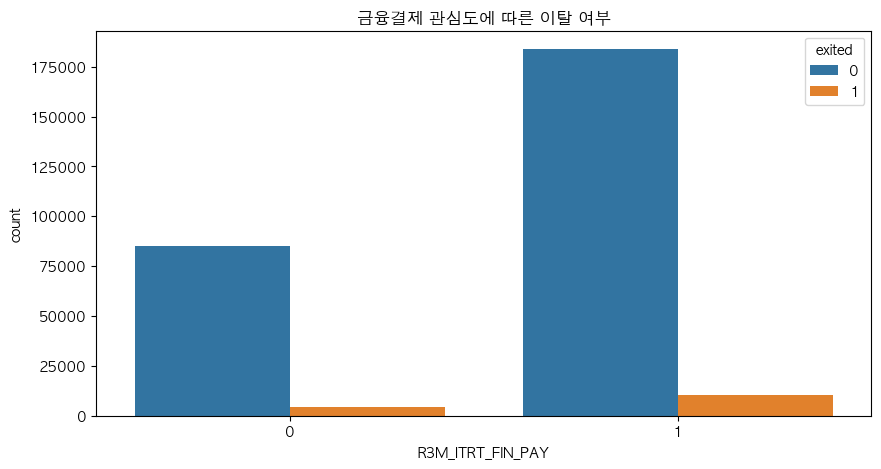

In [50]:
# 금융결제 관심도에 따른 이탈 여부 
plt.figure(figsize=(10, 5))
sns.countplot(data=df_interest, x="R3M_ITRT_FIN_PAY", hue="exited")
plt.title("금융결제 관심도에 따른 이탈 여부")
plt.show()

# 금융결제 관심도(R3M_ITRT_FIN_PAY)가 높을수록 이탈할 확률이 높아지는가?
# 이탈한 고객(주황색)의 수가 금융결제 관심도 1에서 약간 증가하지만, 전체적으로 큰 차이는 없어 보임.
# 즉, 금융결제에 대한 관심도가 이탈에 큰 영향을 미치지는 않을 수도 있음.

In [52]:
df_interest["R3M_ITRT_FIN_PAY"].unique()

array([1, 0])

In [56]:
df_interest.groupby("R3M_ITRT_FIN_PAY")["exited"].mean()


R3M_ITRT_FIN_PAY
0    0.048518
1    0.054338
Name: exited, dtype: float64

In [60]:
# 관심도 0과 1에서 이탈율(%) 계산
exited_rate = df_interest.groupby("R3M_ITRT_FIN_PAY")["exited"].mean() * 100

print("🔹 금융결제 관심도별 이탈율(%)")
print(exited_rate)


🔹 금융결제 관심도별 이탈율(%)
R3M_ITRT_FIN_PAY
0    4.851809
1    5.433776
Name: exited, dtype: float64


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 관심도 컬럼만 선택 (CUST_ID, exited 제외)
X = df_interest.drop(columns=["CUST_ID", "exited"])
y = df_interest["exited"]

# 학습 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 관심도 컬럼별 영향력 출력
importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
print("🔹 관심도가 이탈 여부에 미치는 영향력")
print(importance)


              precision    recall  f1-score   support

           0       0.95      0.63      0.76     53768
           1       0.06      0.42      0.10      3021

    accuracy                           0.62     56789
   macro avg       0.51      0.52      0.43     56789
weighted avg       0.90      0.62      0.72     56789

🔹 관심도가 이탈 여부에 미치는 영향력
R3M_ITRT_FIN_STOCK         0.183018
R3M_ITRT_LIFE_HOUSE        0.164571
R3M_ITRT_INFO_NEWS         0.132840
R3M_ITRT_ENT_RADIO         0.116958
R3M_ITRT_LEISURE_TRAVEL    0.094192
R3M_ITRT_LIFE_HEALTH       0.083936
R3M_ITRT_FIN_ASSET         0.073786
R3M_ITRT_COMM_VOIP         0.062610
R3M_ITRT_SHOP_OPEN         0.060534
R3M_ITRT_LIFE_MOVE         0.056990
R3M_ITRT_COMM_DATE         0.054419
R3M_ITRT_ENT_MUSIC         0.048302
R3M_ITRT_SHOP_JIKGU        0.041644
R3M_ITRT_LIFE_BEAUTY       0.038884
R3M_ITRT_LIFE_KIDS         0.021113
R3M_ITRT_FIN_BANK          0.017272
R3M_ITRT_ENT_BROADCAST     0.016944
R3M_ITRT_INFO_BOOK         0.014821
R3M

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd

# 관심도 컬럼만 선택 (CUST_ID, exited 제외)
X = df_interest.drop(columns=["CUST_ID", "exited"])
y = df_interest["exited"]

# 학습 데이터 분리 (Train/Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 오버샘플링 적용 (SMOTE)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 로지스틱 회귀 모델 학습 (class_weight 제거)
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

# 예측 및 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 관심도 컬럼별 영향력 출력
importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
print("🔹 관심도가 이탈 여부에 미치는 영향력")
print(importance)


              precision    recall  f1-score   support

           0       0.95      0.62      0.75     53768
           1       0.06      0.42      0.10      3021

    accuracy                           0.61     56789
   macro avg       0.50      0.52      0.43     56789
weighted avg       0.90      0.61      0.72     56789

🔹 관심도가 이탈 여부에 미치는 영향력
R3M_ITRT_LEISURE_TRAVEL    0.270132
R3M_ITRT_INFO_NEWS         0.226662
R3M_ITRT_FIN_PAY           0.215595
R3M_ITRT_ENT_PIC           0.148062
R3M_ITRT_LIFE_HOUSE        0.130032
R3M_ITRT_FIN_STOCK         0.127814
R3M_ITRT_LIFE_KIDS         0.119657
R3M_ITRT_SHOP_JIKGU        0.114626
R3M_ITRT_INFO_BLOG         0.113552
R3M_ITRT_LIFE_BEAUTY       0.078117
R3M_ITRT_LIFE_HEALTH       0.074701
R3M_ITRT_ENT_RADIO         0.068857
R3M_ITRT_SHOP_OPEN         0.056291
R3M_ITRT_LIFE_CAR          0.009788
R3M_ITRT_COMM_MESSENGER    0.006339
R3M_ITRT_COMM_VOIP        -0.000665
R3M_ITRT_INFO_PORTAL      -0.007602
R3M_ITRT_ENT_SVOD         -0.020716
R3M

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 평가 결과 출력
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.95      0.83      0.89     53768
           1       0.08      0.28      0.13      3021

    accuracy                           0.80     56789
   macro avg       0.52      0.55      0.51     56789
weighted avg       0.91      0.80      0.85     56789



모델들을 돌려서 예측을 해봤는데... 로지스틱 회귀분석, 랜덤포레스트 둘 다 낮게 나왔다. 
관심도를 표현한 고객이 많이 없고 대부분의 값이 0이기 때문인 것 같다. 
따라서 0이상의 값을 갖는 컬럼들만을 걸러 확인해보자.

In [142]:
import pandas as pd

# 관심도 컬럼 리스트
interest_columns = [
    "R3M_ITRT_FIN_PAY", "R3M_ITRT_FIN_INSUR", "R3M_ITRT_FIN_COIN", "R3M_ITRT_FIN_BANK", "R3M_ITRT_FIN_ASSET",
    "R3M_ITRT_FIN_STOCK", "R3M_ITRT_LIFE_HEALTH", "R3M_ITRT_LIFE_DELIVERY", "R3M_ITRT_LIFE_HOUSE",
    "R3M_ITRT_LIFE_MOVE", "R3M_ITRT_LIFE_CAR", "R3M_ITRT_LIFE_KIDS", "R3M_ITRT_LIFE_BEAUTY", "R3M_ITRT_SHOP_MART",
    "R3M_ITRT_SHOP_SOCIAL", "R3M_ITRT_SHOP_OPEN", "R3M_ITRT_SHOP_BEAUTY", "R3M_ITRT_SHOP_JIKGU",
    "R3M_ITRT_LEISURE_SPORT", "R3M_ITRT_LEISURE_TRAVEL", "R3M_ITRT_LEISURE_HOTEL", "R3M_ITRT_ENT_SVOD",
    "R3M_ITRT_ENT_BROADCAST", "R3M_ITRT_ENT_RADIO", "R3M_ITRT_ENT_PIC", "R3M_ITRT_ENT_WEBTOON",
    "R3M_ITRT_ENT_MUSIC", "R3M_ITRT_INFO_NEWS", "R3M_ITRT_INFO_BOOK", "R3M_ITRT_INFO_BLOG",
    "R3M_ITRT_INFO_PORTAL", "R3M_ITRT_COMM_SNS", "R3M_ITRT_COMM_VOIP", "R3M_ITRT_COMM_DATE",
    "R3M_ITRT_COMM_MESSENGER"
]

def filter_interest_columns(df, threshold=0, min_count=0):
    """
    입력한 threshold 값보다 큰 데이터가 있는 컬럼과 개수를 출력하는 함수 (min_count 조건 추가)

    Parameters:
        df (pd.DataFrame): 관심도 데이터프레임
        threshold (int): 필터링할 기준값 (예: threshold=0이면 0 초과인 데이터만 필터링)
        min_count (int): 최소 개수 기준 (예: 1000이면 1000개 이상 존재하는 컬럼만 출력)

    Returns:
        result (dict): { 컬럼명: 해당 값보다 큰 데이터 개수 }
    """
    result = {}

    for col in interest_columns:
        count = (df[col] > threshold).sum()  # threshold보다 큰 값 개수 계산
        if count >= min_count:  # min_count 이상인 경우만 저장
            result[col] = count

    return result  # 필터링 결과 반환

# ✅ 함수 실행 예제 (예: 1보다 큰 값 중, 1000개 이상인 컬럼만 출력)
threshold_value = 1  # 임계값 (예: 1보다 큰 값 필터링)
min_count_value = 10000  # 최소 개수 기준 (10000개 이상만 출력)

filtered_columns = filter_interest_columns(df_interest, threshold_value, min_count_value)

# ✅ 결과 출력
print(f"{threshold_value}보다 큰 값이 존재하는 컬럼 중, {min_count_value}개 이상 존재하는 컬럼과 개수:")
for col, count in filtered_columns.items():
    print(f"{col}: {count}개")

1보다 큰 값이 존재하는 컬럼 중, 10000개 이상 존재하는 컬럼과 개수:
R3M_ITRT_FIN_BANK: 24197개
R3M_ITRT_LIFE_DELIVERY: 13083개
R3M_ITRT_SHOP_SOCIAL: 37905개
R3M_ITRT_SHOP_OPEN: 36838개
R3M_ITRT_SHOP_BEAUTY: 17101개
R3M_ITRT_ENT_SVOD: 34905개
R3M_ITRT_ENT_BROADCAST: 162255개
R3M_ITRT_ENT_MUSIC: 27644개
R3M_ITRT_INFO_BLOG: 35409개
R3M_ITRT_INFO_PORTAL: 178399개
R3M_ITRT_COMM_SNS: 78549개
R3M_ITRT_COMM_MESSENGER: 139363개


In [154]:
df_interest.groupby("exited")["R3M_ITRT_FIN_BANK"].mean()

exited
0    0.778584
1    0.809230
Name: R3M_ITRT_FIN_BANK, dtype: float64

In [184]:
def groupby_exited_cal(df, col, cal):
    """
    exited 별 컬럼 계산
    """  
    return df.groupby("exited")[col].agg(cal)

test = groupby_exited_cal(df_interest, "R3M_ITRT_FIN_BANK", "mean")
test

exited
0    0.778584
1    0.809230
Name: R3M_ITRT_FIN_BANK, dtype: float64

In [186]:
test = groupby_exited_cal(df_interest, "R3M_ITRT_LIFE_DELIVERY", "mean")
test

exited
0    0.578485
1    0.602629
Name: R3M_ITRT_LIFE_DELIVERY, dtype: float64

In [192]:
import pandas as pd

# 관심도 컬럼 리스트
interest_columns = [
    "R3M_ITRT_FIN_PAY", "R3M_ITRT_FIN_INSUR", "R3M_ITRT_FIN_COIN", "R3M_ITRT_FIN_BANK", "R3M_ITRT_FIN_ASSET",
    "R3M_ITRT_FIN_STOCK", "R3M_ITRT_LIFE_HEALTH", "R3M_ITRT_LIFE_DELIVERY", "R3M_ITRT_LIFE_HOUSE",
    "R3M_ITRT_LIFE_MOVE", "R3M_ITRT_LIFE_CAR", "R3M_ITRT_LIFE_KIDS", "R3M_ITRT_LIFE_BEAUTY", "R3M_ITRT_SHOP_MART",
    "R3M_ITRT_SHOP_SOCIAL", "R3M_ITRT_SHOP_OPEN", "R3M_ITRT_SHOP_BEAUTY", "R3M_ITRT_SHOP_JIKGU",
    "R3M_ITRT_LEISURE_SPORT", "R3M_ITRT_LEISURE_TRAVEL", "R3M_ITRT_LEISURE_HOTEL", "R3M_ITRT_ENT_SVOD",
    "R3M_ITRT_ENT_BROADCAST", "R3M_ITRT_ENT_RADIO", "R3M_ITRT_ENT_PIC", "R3M_ITRT_ENT_WEBTOON",
    "R3M_ITRT_ENT_MUSIC", "R3M_ITRT_INFO_NEWS", "R3M_ITRT_INFO_BOOK", "R3M_ITRT_INFO_BLOG",
    "R3M_ITRT_INFO_PORTAL", "R3M_ITRT_COMM_SNS", "R3M_ITRT_COMM_VOIP", "R3M_ITRT_COMM_DATE",
    "R3M_ITRT_COMM_MESSENGER"
]

def filter_interest_columns(df, threshold=0, min_count=0):
    """
    입력한 threshold 값보다 큰 데이터가 있는 컬럼과 개수를 출력하는 함수 (min_count 조건 추가)

    Parameters:
        df (pd.DataFrame): 관심도 데이터프레임
        threshold (int): 필터링할 기준값 (예: threshold=0이면 0 초과인 데이터만 필터링)
        min_count (int): 최소 개수 기준 (예: 1000이면 1000개 이상 존재하는 컬럼만 출력)

    Returns:
        filtered_columns (list): 조건을 만족하는 컬럼 리스트
        result (dict): { 컬럼명: 해당 값보다 큰 데이터 개수 }
    """
    result = {}
    filtered_columns = []

    for col in interest_columns:
        count = (df[col] > threshold).sum()  # threshold보다 큰 값 개수 계산
        if count >= min_count:  # min_count 이상인 경우만 저장
            result[col] = count
            filtered_columns.append(col)  # 리스트에 컬럼 추가

    return filtered_columns, result  # 필터링된 컬럼 리스트와 개수 반환


def groupby_exited_cal(df, columns, cal):
    """
    특정 컬럼 리스트에 대해 exited(이탈 여부)별 그룹 연산 적용

    Parameters:
        df (pd.DataFrame): 데이터프레임
        columns (list): 그룹화할 대상 컬럼 리스트
        cal (str): 적용할 연산 ('mean', 'sum', 'count' 등)

    Returns:
        pandas.DataFrame: 그룹별 계산 결과
    """
    return df.groupby("exited")[columns].agg(cal)  # 여러 컬럼에 대해 그룹화 후 연산 적용


# 함수 실행 예제 (예: 1보다 큰 값 중, 10000개 이상인 컬럼만 선택)
threshold_value = 1  # 임계값 (예: 1보다 큰 값 필터링)
min_count_value = 10000  # 최소 개수 기준 (10000개 이상만 출력)

filtered_columns, filtered_counts = filter_interest_columns(df_interest, threshold_value, min_count_value)

# 결과 출력
print(f"\n🔹 {threshold_value}보다 큰 값이 존재하는 컬럼 중, {min_count_value}개 이상 존재하는 컬럼과 개수:")
for col, count in filtered_counts.items():
    print(f"{col}: {count}개")

# `filtered_columns` 리스트를 활용해 `exited`별 그룹 연산 수행
aggregation_method = "mean"  # 변경 가능 (예: "sum", "count" 등)
grouped_results = groupby_exited_cal(df_interest, filtered_columns, aggregation_method)

# Jupyter Notebook에서 결과 확인
print("\n🔹 이탈 여부별 관심도 컬럼 평균 비교:")
display(grouped_results)  



🔹 1보다 큰 값이 존재하는 컬럼 중, 10000개 이상 존재하는 컬럼과 개수:
R3M_ITRT_FIN_BANK: 24197개
R3M_ITRT_LIFE_DELIVERY: 13083개
R3M_ITRT_SHOP_SOCIAL: 37905개
R3M_ITRT_SHOP_OPEN: 36838개
R3M_ITRT_SHOP_BEAUTY: 17101개
R3M_ITRT_ENT_SVOD: 34905개
R3M_ITRT_ENT_BROADCAST: 162255개
R3M_ITRT_ENT_MUSIC: 27644개
R3M_ITRT_INFO_BLOG: 35409개
R3M_ITRT_INFO_PORTAL: 178399개
R3M_ITRT_COMM_SNS: 78549개
R3M_ITRT_COMM_MESSENGER: 139363개

🔹 이탈 여부별 관심도 컬럼 평균 비교:


,R3M_ITRT_FIN_BANK,R3M_ITRT_LIFE_DELIVERY,R3M_ITRT_SHOP_SOCIAL,R3M_ITRT_SHOP_OPEN,R3M_ITRT_SHOP_BEAUTY,R3M_ITRT_ENT_SVOD,R3M_ITRT_ENT_BROADCAST,R3M_ITRT_ENT_MUSIC,R3M_ITRT_INFO_BLOG,R3M_ITRT_INFO_PORTAL,R3M_ITRT_COMM_SNS,R3M_ITRT_COMM_MESSENGER
exited,,,,,,,,,,,,
0,0.778584,0.578485,0.783513,0.807870,0.581834,0.518014,1.372124,0.779235,0.800626,1.355304,1.022960,1.219959
1,0.809230,0.602629,0.817078,0.844513,0.613764,0.539039,1.414744,0.807754,0.829622,1.399517,1.040381,1.261068


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


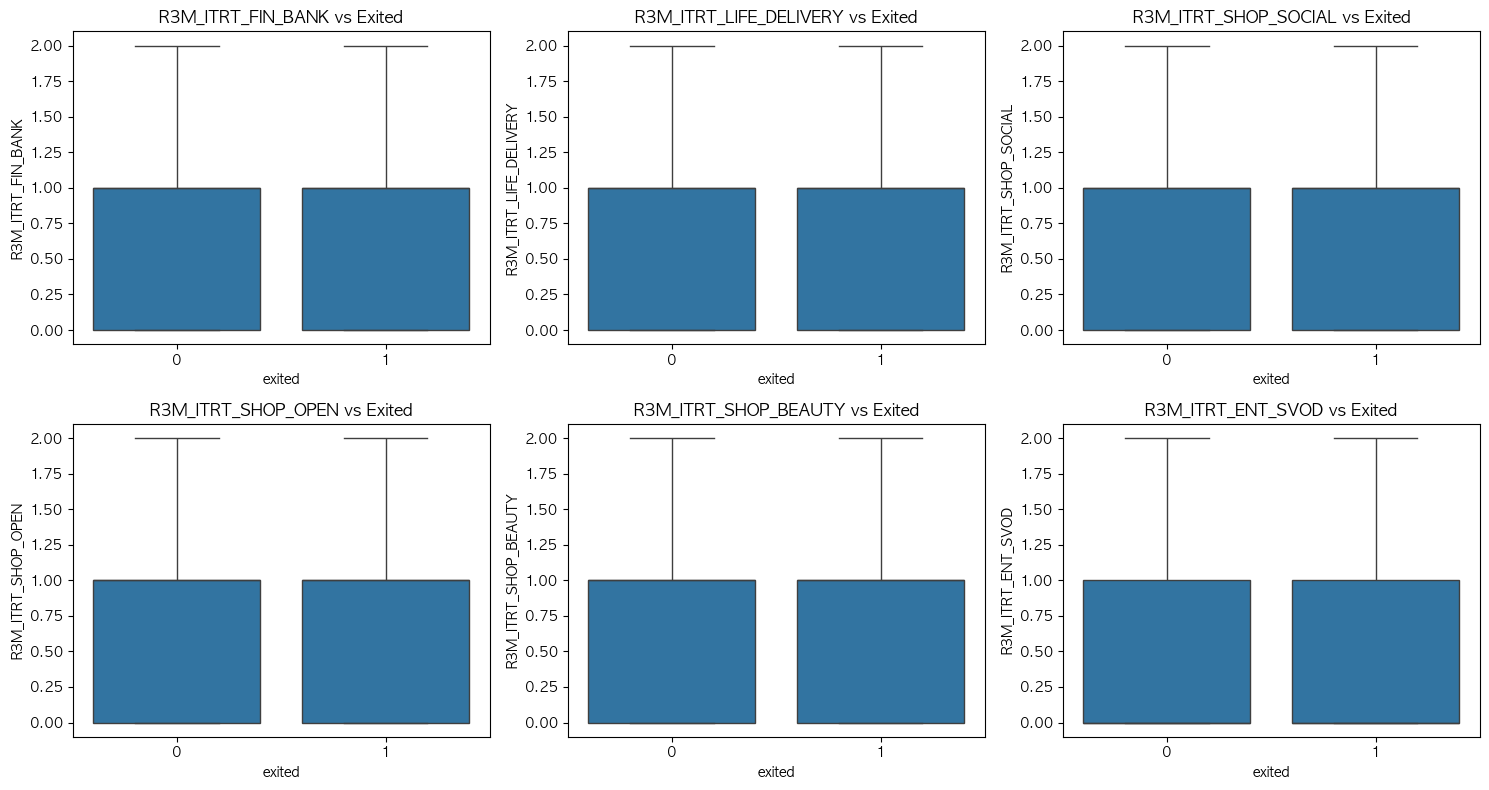

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for i, col in enumerate(filtered_columns[:6], 1):  # 상위 6개 컬럼만 그리기
    plt.subplot(2, 3, i)
    sns.boxplot(x="exited", y=col, data=df_interest)
    plt.title(f"{col} vs Exited")

plt.tight_layout()
plt.show()


## YoY 컬럼들이 있길래... 다시 불러와서 다시 관심도 연관성 확인...!

In [206]:
# 📌 전년 동기 대비(YoY) 관심도 컬럼 리스트
YoY_interest_columns = [
    "CUST_ID", 
    "YOY_R3M_ITRT_FIN_PAY_CS",  # 전년동기대비_금융_결제_관심도_변화
    "YOY_R3M_ITRT_FIN_INSUR_CS",  # 전년동기대비_금융_보험_관심도_변화
    "YOY_R3M_ITRT_FIN_COIN_CS",  # 전년동기대비_금융_암호화폐_관심도_변화
    "YOY_R3M_ITRT_FIN_BANK_CS",  # 전년동기대비_금융_은행/카드_관심도_변화
    "YOY_R3M_ITRT_FIN_ASSET_CS",  # 전년동기대비_금융_자산관리_관심도_변화
    "YOY_R3M_ITRT_FIN_STOCK_CS",  # 전년동기대비_금융_증권_관심도_변화
    "YOY_R3M_ITRT_LIFE_HEALTH_CS",  # 전년동기대비_생활_건강/운동/의료_관심도_변화
    "YOY_R3M_ITRT_LIFE_DELIVERY_CS",  # 전년동기대비_생활_배달/식음료_관심도_변화
    "YOY_R3M_ITRT_LIFE_HOUSE_CS",  # 전년동기대비_생활_부동산_관심도_변화
    "YOY_R3M_ITRT_LIFE_MOVE_CS",  # 전년동기대비_생활_이사/인테리어_관심도_변화
    "YOY_R3M_ITRT_LIFE_CAR_CS",  # 전년동기대비_생활_카라이프_관심도_변화
    "YOY_R3M_ITRT_LIFE_KIDS_CS",  # 전년동기대비_생활_키즈_관심도_변화
    "YOY_R3M_ITRT_LIFE_BEAUTY_CS",  # 전년동기대비_생활_뷰티_관심도_변화
    "YOY_R3M_ITRT_SHOP_MART_CS",  # 전년동기대비_쇼핑_백화점/대형마트/면세점_관심도_변화
    "YOY_R3M_ITRT_SHOP_SOCIAL_CS",  # 전년동기대비_쇼핑_소셜커머스_관심도_변화
    "YOY_R3M_ITRT_SHOP_OPEN_CS",  # 전년동기대비_쇼핑_오픈마켓_관심도_변화
    "YOY_R3M_ITRT_SHOP_BEAUTY_CS",  # 전년동기대비_쇼핑_패션/뷰티_관심도_변화
    "YOY_R3M_ITRT_SHOP_JIKGU_CS",  # 전년동기대비_쇼핑_해외직구_관심도_변화
    "YOY_R3M_ITRT_LEISURE_SPORT_CS",  # 전년동기대비_레저_스포츠_관심도_변화
    "YOY_R3M_ITRT_LEISURE_TRAVEL_CS",  # 전년동기대비_레저_여행_관심도_변화
    "YOY_R3M_ITRT_LEISURE_HOTEL_CS",  # 전년동기대비_레저_호텔/숙박_관심도_변화
    "YOY_R3M_ITRT_ENT_SVOD_CS",  # 전년동기대비_엔터_sVOD_관심도_변화
    "YOY_R3M_ITRT_ENT_BROADCAST_CS",  # 전년동기대비_엔터_동영상/방송_관심도_변화
    "YOY_R3M_ITRT_ENT_RADIO_CS",  # 전년동기대비_엔터_라디오_관심도_변화
    "YOY_R3M_ITRT_ENT_PIC_CS",  # 전년동기대비_엔터_사진_관심도_변화
    "YOY_R3M_ITRT_ENT_WEBTOON_CS",  # 전년동기대비_엔터_웹툰/애니_관심도_변화
    "YOY_R3M_ITRT_ENT_MUSIC_CS",  # 전년동기대비_엔터_음악_관심도_변화
    "YOY_R3M_ITRT_INFO_NEWS_CS",  # 전년동기대비_정보_뉴스_관심도_변화
    "YOY_R3M_ITRT_INFO_BOOK_CS",  # 전년동기대비_정보_도서/잡지_관심도_변화
    "YOY_R3M_ITRT_INFO_BLOG_CS",  # 전년동기대비_정보_블로그_관심도_변화
    "YOY_R3M_ITRT_INFO_PORTAL_CS",  # 전년동기대비_정보_포탈_관심도_변화
    "YOY_R3M_ITRT_COMM_SNS_CS",  # 전년동기대비_커뮤_SNS_관심도_변화
    "YOY_R3M_ITRT_COMM_VOIP_CS",  # 전년동기대비_커뮤_VoIP_관심도_변화
    "YOY_R3M_ITRT_COMM_DATE_CS",  # 전년동기대비_커뮤_데이트_관심도_변화
    "YOY_R3M_ITRT_COMM_MESSENGER_CS",  # 전년동기대비_커뮤_메신저_관심도_변화
    "exited" # 이탈여부 
]


In [208]:
df_yoy_itrt = df[YoY_interest_columns]

df_yoy_itrt

,CUST_ID,YOY_R3M_ITRT_FIN_PAY_CS,YOY_R3M_ITRT_FIN_INSUR_CS,YOY_R3M_ITRT_FIN_COIN_CS,YOY_R3M_ITRT_FIN_BANK_CS,YOY_R3M_ITRT_FIN_ASSET_CS,YOY_R3M_ITRT_FIN_STOCK_CS,YOY_R3M_ITRT_LIFE_HEALTH_CS,YOY_R3M_ITRT_LIFE_DELIVERY_CS,YOY_R3M_ITRT_LIFE_HOUSE_CS,...,YOY_R3M_ITRT_ENT_MUSIC_CS,YOY_R3M_ITRT_INFO_NEWS_CS,YOY_R3M_ITRT_INFO_BOOK_CS,YOY_R3M_ITRT_INFO_BLOG_CS,YOY_R3M_ITRT_INFO_PORTAL_CS,YOY_R3M_ITRT_COMM_SNS_CS,YOY_R3M_ITRT_COMM_VOIP_CS,YOY_R3M_ITRT_COMM_DATE_CS,YOY_R3M_ITRT_COMM_MESSENGER_CS,exited
0,SYN_0,0,0,0,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
1,SYN_1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,SYN_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SYN_4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,SYN_5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329994,SYN_329994,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
329995,SYN_329995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
329996,SYN_329996,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
329998,SYN_329998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
df_yoy_itrt.isna().sum()

CUST_ID                           0
YOY_R3M_ITRT_FIN_PAY_CS           0
YOY_R3M_ITRT_FIN_INSUR_CS         0
YOY_R3M_ITRT_FIN_COIN_CS          0
YOY_R3M_ITRT_FIN_BANK_CS          0
YOY_R3M_ITRT_FIN_ASSET_CS         0
YOY_R3M_ITRT_FIN_STOCK_CS         0
YOY_R3M_ITRT_LIFE_HEALTH_CS       0
YOY_R3M_ITRT_LIFE_DELIVERY_CS     0
YOY_R3M_ITRT_LIFE_HOUSE_CS        0
YOY_R3M_ITRT_LIFE_MOVE_CS         0
YOY_R3M_ITRT_LIFE_CAR_CS          0
YOY_R3M_ITRT_LIFE_KIDS_CS         0
YOY_R3M_ITRT_LIFE_BEAUTY_CS       0
YOY_R3M_ITRT_SHOP_MART_CS         0
YOY_R3M_ITRT_SHOP_SOCIAL_CS       0
YOY_R3M_ITRT_SHOP_OPEN_CS         0
YOY_R3M_ITRT_SHOP_BEAUTY_CS       0
YOY_R3M_ITRT_SHOP_JIKGU_CS        0
YOY_R3M_ITRT_LEISURE_SPORT_CS     0
YOY_R3M_ITRT_LEISURE_TRAVEL_CS    0
YOY_R3M_ITRT_LEISURE_HOTEL_CS     0
YOY_R3M_ITRT_ENT_SVOD_CS          0
YOY_R3M_ITRT_ENT_BROADCAST_CS     0
YOY_R3M_ITRT_ENT_RADIO_CS         0
YOY_R3M_ITRT_ENT_PIC_CS           0
YOY_R3M_ITRT_ENT_WEBTOON_CS       0
YOY_R3M_ITRT_ENT_MUSIC_CS   

In [220]:
df_yoy_itrt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283945 entries, 0 to 329999
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   CUST_ID                         283945 non-null  object
 1   YOY_R3M_ITRT_FIN_PAY_CS         283945 non-null  int64 
 2   YOY_R3M_ITRT_FIN_INSUR_CS       283945 non-null  int64 
 3   YOY_R3M_ITRT_FIN_COIN_CS        283945 non-null  int64 
 4   YOY_R3M_ITRT_FIN_BANK_CS        283945 non-null  int64 
 5   YOY_R3M_ITRT_FIN_ASSET_CS       283945 non-null  int64 
 6   YOY_R3M_ITRT_FIN_STOCK_CS       283945 non-null  int64 
 7   YOY_R3M_ITRT_LIFE_HEALTH_CS     283945 non-null  int64 
 8   YOY_R3M_ITRT_LIFE_DELIVERY_CS   283945 non-null  int64 
 9   YOY_R3M_ITRT_LIFE_HOUSE_CS      283945 non-null  int64 
 10  YOY_R3M_ITRT_LIFE_MOVE_CS       283945 non-null  int64 
 11  YOY_R3M_ITRT_LIFE_CAR_CS        283945 non-null  int64 
 12  YOY_R3M_ITRT_LIFE_KIDS_CS       283

In [236]:
# 전년 동기 대비(YoY) 관심도 컬럼 리스트
YoY_itrt_columns = [
    "YOY_R3M_ITRT_FIN_PAY_CS",  # 전년동기대비_금융_결제_관심도_변화
    "YOY_R3M_ITRT_FIN_INSUR_CS",  # 전년동기대비_금융_보험_관심도_변화
    "YOY_R3M_ITRT_FIN_COIN_CS",  # 전년동기대비_금융_암호화폐_관심도_변화
    "YOY_R3M_ITRT_FIN_BANK_CS",  # 전년동기대비_금융_은행/카드_관심도_변화
    "YOY_R3M_ITRT_FIN_ASSET_CS",  # 전년동기대비_금융_자산관리_관심도_변화
    "YOY_R3M_ITRT_FIN_STOCK_CS",  # 전년동기대비_금융_증권_관심도_변화
    "YOY_R3M_ITRT_LIFE_HEALTH_CS",  # 전년동기대비_생활_건강/운동/의료_관심도_변화
    "YOY_R3M_ITRT_LIFE_DELIVERY_CS",  # 전년동기대비_생활_배달/식음료_관심도_변화
    "YOY_R3M_ITRT_LIFE_HOUSE_CS",  # 전년동기대비_생활_부동산_관심도_변화
    "YOY_R3M_ITRT_LIFE_MOVE_CS",  # 전년동기대비_생활_이사/인테리어_관심도_변화
    "YOY_R3M_ITRT_LIFE_CAR_CS",  # 전년동기대비_생활_카라이프_관심도_변화
    "YOY_R3M_ITRT_LIFE_KIDS_CS",  # 전년동기대비_생활_키즈_관심도_변화
    "YOY_R3M_ITRT_LIFE_BEAUTY_CS",  # 전년동기대비_생활_뷰티_관심도_변화
    "YOY_R3M_ITRT_SHOP_MART_CS",  # 전년동기대비_쇼핑_백화점/대형마트/면세점_관심도_변화
    "YOY_R3M_ITRT_SHOP_SOCIAL_CS",  # 전년동기대비_쇼핑_소셜커머스_관심도_변화
    "YOY_R3M_ITRT_SHOP_OPEN_CS",  # 전년동기대비_쇼핑_오픈마켓_관심도_변화
    "YOY_R3M_ITRT_SHOP_BEAUTY_CS",  # 전년동기대비_쇼핑_패션/뷰티_관심도_변화
    "YOY_R3M_ITRT_SHOP_JIKGU_CS",  # 전년동기대비_쇼핑_해외직구_관심도_변화
    "YOY_R3M_ITRT_LEISURE_SPORT_CS",  # 전년동기대비_레저_스포츠_관심도_변화
    "YOY_R3M_ITRT_LEISURE_TRAVEL_CS",  # 전년동기대비_레저_여행_관심도_변화
    "YOY_R3M_ITRT_LEISURE_HOTEL_CS",  # 전년동기대비_레저_호텔/숙박_관심도_변화
    "YOY_R3M_ITRT_ENT_SVOD_CS",  # 전년동기대비_엔터_sVOD_관심도_변화
    "YOY_R3M_ITRT_ENT_BROADCAST_CS",  # 전년동기대비_엔터_동영상/방송_관심도_변화
    "YOY_R3M_ITRT_ENT_RADIO_CS",  # 전년동기대비_엔터_라디오_관심도_변화
    "YOY_R3M_ITRT_ENT_PIC_CS",  # 전년동기대비_엔터_사진_관심도_변화
    "YOY_R3M_ITRT_ENT_WEBTOON_CS",  # 전년동기대비_엔터_웹툰/애니_관심도_변화
    "YOY_R3M_ITRT_ENT_MUSIC_CS",  # 전년동기대비_엔터_음악_관심도_변화
    "YOY_R3M_ITRT_INFO_NEWS_CS",  # 전년동기대비_정보_뉴스_관심도_변화
    "YOY_R3M_ITRT_INFO_BOOK_CS",  # 전년동기대비_정보_도서/잡지_관심도_변화
    "YOY_R3M_ITRT_INFO_BLOG_CS",  # 전년동기대비_정보_블로그_관심도_변화
    "YOY_R3M_ITRT_INFO_PORTAL_CS",  # 전년동기대비_정보_포탈_관심도_변화
    "YOY_R3M_ITRT_COMM_SNS_CS",  # 전년동기대비_커뮤_SNS_관심도_변화
    "YOY_R3M_ITRT_COMM_VOIP_CS",  # 전년동기대비_커뮤_VoIP_관심도_변화
    "YOY_R3M_ITRT_COMM_DATE_CS",  # 전년동기대비_커뮤_데이트_관심도_변화
    "YOY_R3M_ITRT_COMM_MESSENGER_CS",  # 전년동기대비_커뮤_메신저_관심도_변화
    "exited" # 이탈여부 
]


In [244]:

def filter_YoY_columns(df, threshold=0, min_count=0):
    """
    입력한 threshold 값보다 큰 데이터가 있는 YoY 컬럼과 개수를 출력하는 함수 (min_count 조건 추가)

    Parameters:
        df (pd.DataFrame): 관심도 데이터프레임
        threshold (int): 필터링할 기준값 (예: threshold=0이면 0 초과인 데이터만 필터링)
        min_count (int): 최소 개수 기준 (예: 1000이면 1000개 이상 존재하는 컬럼만 출력)

    Returns:
        result (dict): { 컬럼명: 해당 값보다 큰 데이터 개수 }
    """
    result = {}

    for col in YoY_itrt_columns:  # 올바른 컬럼 리스트 사용!
        if col in df.columns:  # 데이터프레임에 존재하는 컬럼만 필터링
            count = (df[col] > threshold).sum()
            if count >= min_count:
                result[col] = count

    return result  # 필터링 결과 반환

# 함수 실행 예제
threshold_value = 0
min_count_value = 10000

filtered_columns = filter_YoY_columns(df_yoy_itrt, threshold_value, min_count_value)

# ✅ 결과 출력
print(f"{threshold_value}보다 큰 값이 존재하는 컬럼 중, {min_count_value}개 이상 존재하는 컬럼과 개수:")
for col, count in filtered_columns.items():
    print(f"{col}: {count}개")


0보다 큰 값이 존재하는 컬럼 중, 10000개 이상 존재하는 컬럼과 개수:
YOY_R3M_ITRT_FIN_COIN_CS: 41873개
YOY_R3M_ITRT_FIN_BANK_CS: 11852개
YOY_R3M_ITRT_FIN_STOCK_CS: 10612개
YOY_R3M_ITRT_LIFE_HEALTH_CS: 12197개
YOY_R3M_ITRT_LIFE_DELIVERY_CS: 13408개
YOY_R3M_ITRT_LIFE_CAR_CS: 10920개
YOY_R3M_ITRT_LIFE_KIDS_CS: 16703개
YOY_R3M_ITRT_SHOP_MART_CS: 11661개
YOY_R3M_ITRT_SHOP_SOCIAL_CS: 13575개
YOY_R3M_ITRT_SHOP_OPEN_CS: 12679개
YOY_R3M_ITRT_SHOP_BEAUTY_CS: 11288개
YOY_R3M_ITRT_SHOP_JIKGU_CS: 13558개
YOY_R3M_ITRT_LEISURE_SPORT_CS: 20136개
YOY_R3M_ITRT_LEISURE_TRAVEL_CS: 16127개
YOY_R3M_ITRT_LEISURE_HOTEL_CS: 11106개
YOY_R3M_ITRT_ENT_SVOD_CS: 11251개
YOY_R3M_ITRT_ENT_BROADCAST_CS: 12979개
YOY_R3M_ITRT_ENT_RADIO_CS: 13258개
YOY_R3M_ITRT_ENT_WEBTOON_CS: 16136개
YOY_R3M_ITRT_INFO_NEWS_CS: 13521개
YOY_R3M_ITRT_INFO_BOOK_CS: 20335개
YOY_R3M_ITRT_INFO_BLOG_CS: 10675개
YOY_R3M_ITRT_COMM_SNS_CS: 10286개
YOY_R3M_ITRT_COMM_MESSENGER_CS: 10020개
exited: 14908개


In [240]:
df_yoy_itrt["YOY_R3M_ITRT_FIN_PAY_CS"].unique()

array([ 0,  1, -1])

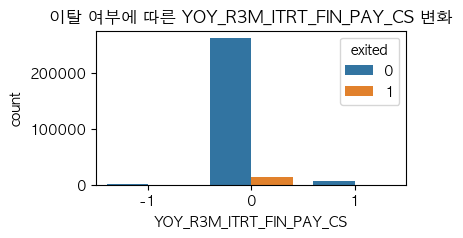

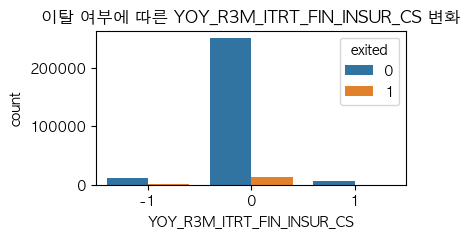

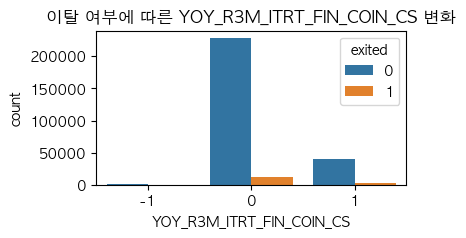

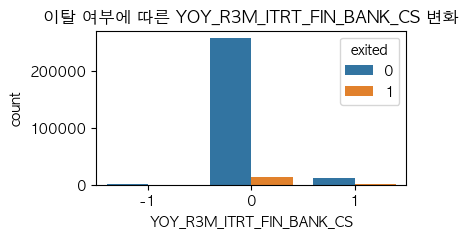

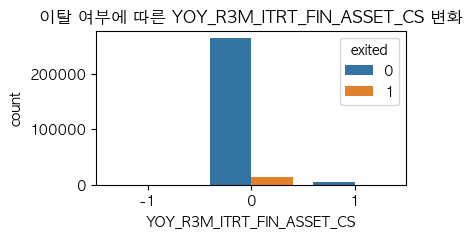

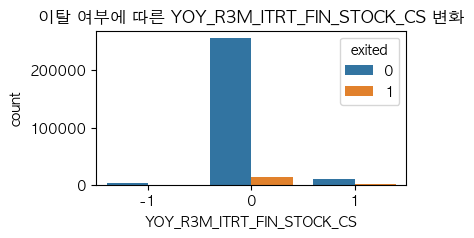

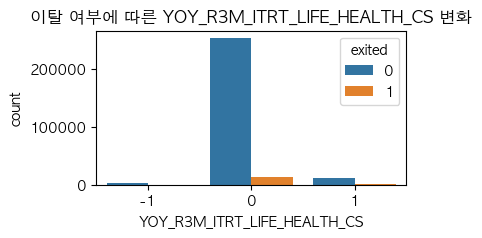

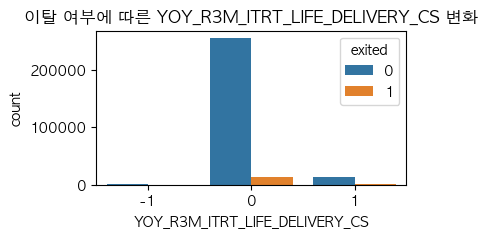

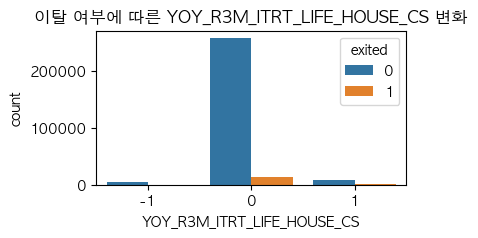

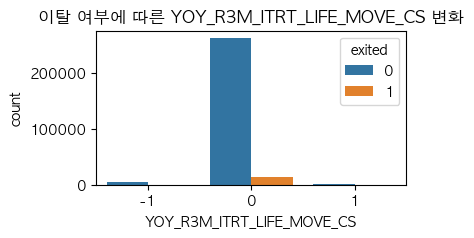

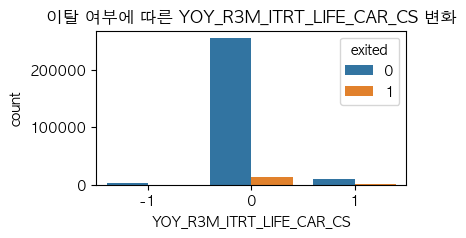

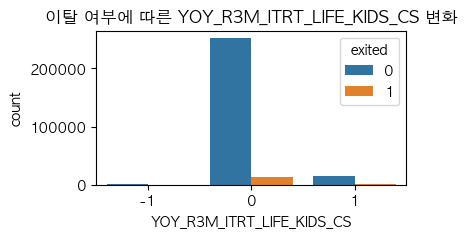

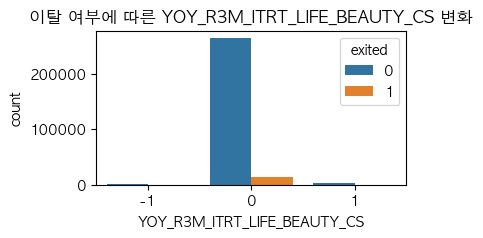

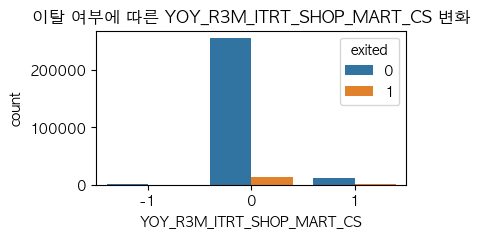

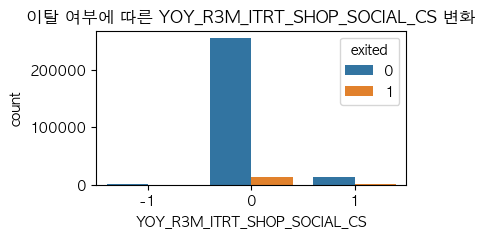

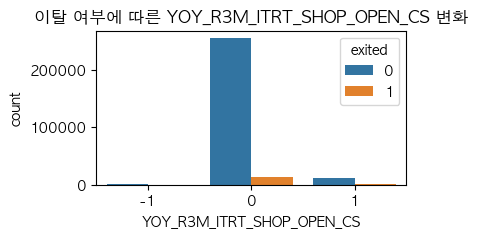

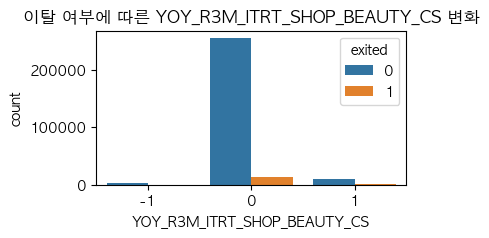

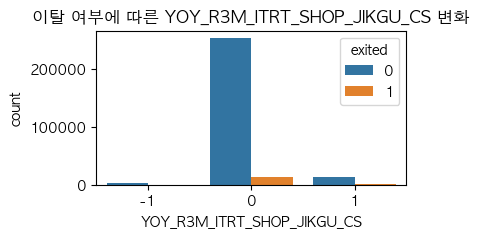

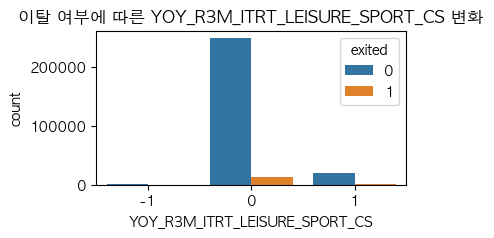

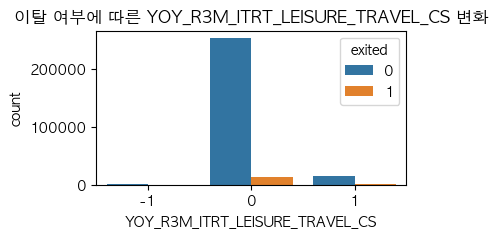

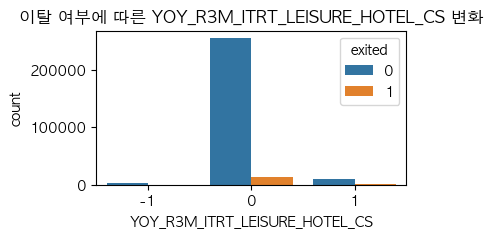

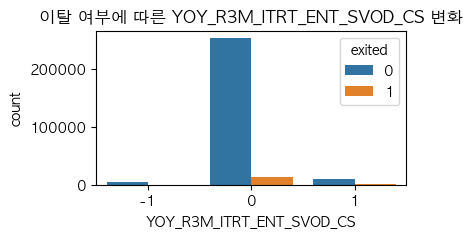

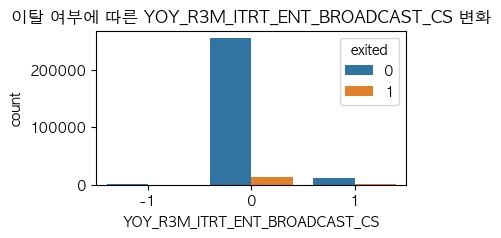

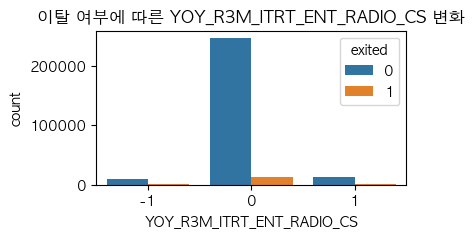

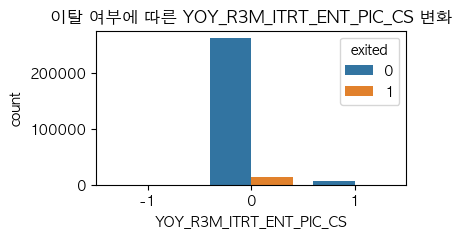

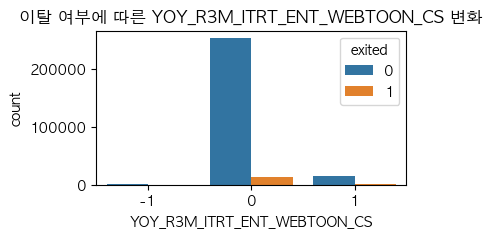

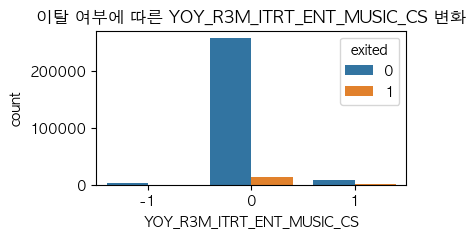

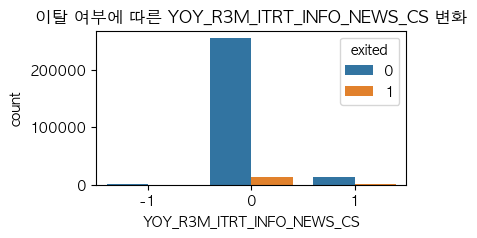

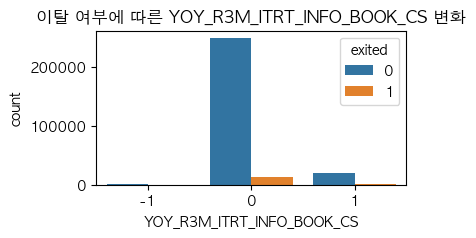

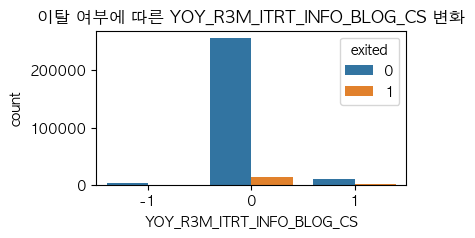

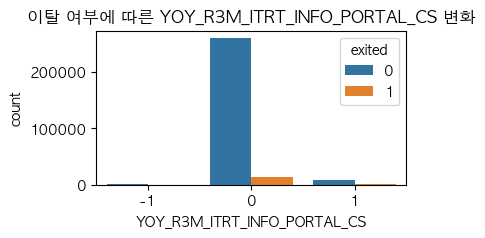

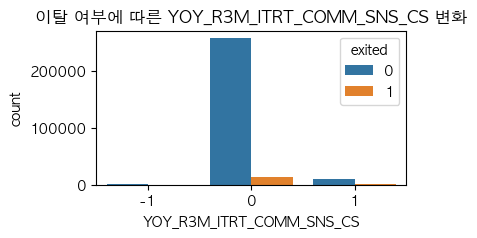

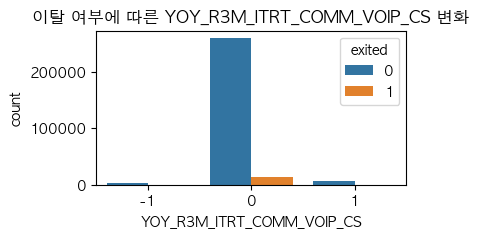

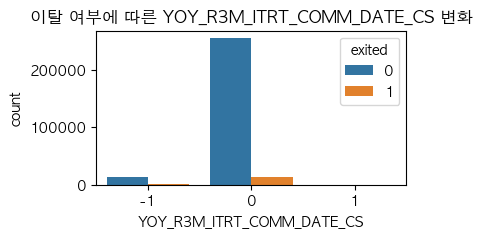

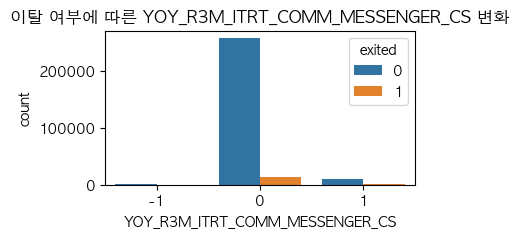

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 YoY 컬럼에 대해 exited(이탈여부) 별로 관심도의 변화 분포 확인
for col in YoY_interest_columns:
    if col not in ["CUST_ID", "exited"]:  # CUST_ID와 exited 제외
        plt.figure(figsize=(4, 2))
        sns.countplot(x=col, hue="exited", data=df_yoy_itrt)
        plt.title(f"이탈 여부에 따른 {col} 변화")
        plt.show()

# 여전히 0값이 너무많고, -1이나 1은 많이 적다...

In [252]:
# 이탈 여부별 평균 관심도 변화 (각 YoY 컬럼에 대해)
def groupby_exited_yoy(df, columns):
    result = df.groupby("exited")[columns].mean()  # exited 기준으로 각 컬럼의 평균값 계산
    return result

# 실행 예시
yoy_mean_by_exited = groupby_exited_yoy(df_yoy_itrt, YoY_itrt_columns)

# 출력
print("🔹 이탈 여부별 전년 동기 대비 관심도 변화 평균:")
print(yoy_mean_by_exited)


🔹 이탈 여부별 전년 동기 대비 관심도 변화 평균:
        YOY_R3M_ITRT_FIN_PAY_CS  YOY_R3M_ITRT_FIN_INSUR_CS  \
exited                                                       
0                      0.017091                  -0.020172   
1                      0.017239                  -0.017910   

        YOY_R3M_ITRT_FIN_COIN_CS  YOY_R3M_ITRT_FIN_BANK_CS  \
exited                                                       
0                       0.144954                  0.037991   
1                       0.137711                  0.037832   

        YOY_R3M_ITRT_FIN_ASSET_CS  YOY_R3M_ITRT_FIN_STOCK_CS  \
exited                                                         
0                        0.015095                   0.027617   
1                        0.014757                   0.027301   

        YOY_R3M_ITRT_LIFE_HEALTH_CS  YOY_R3M_ITRT_LIFE_DELIVERY_CS  \
exited                                                               
0                          0.030278                       0.041426   
1     

In [254]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# X: YoY 관심도 컬럼, y: 이탈 여부
X = df_yoy_itrt[YoY_interest_columns].drop(columns=["CUST_ID", "exited"])
y = df_yoy_itrt["exited"]

# 학습 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97     53768
           1       0.06      0.00      0.01      3021

    accuracy                           0.94     56789
   macro avg       0.50      0.50      0.49     56789
weighted avg       0.90      0.94      0.92     56789



In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 관심도 컬럼만 선택 (CUST_ID, exited 제외)
X = df_yoy_itrt[YoY_interest_columns].drop(columns=["CUST_ID", "exited"])
y = df_yoy_itrt["exited"]

# 학습 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 관심도 컬럼별 영향력 출력
importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
print(" 관심도가 이탈 여부에 미치는 영향력")
print(importance)


              precision    recall  f1-score   support

           0       0.95      0.73      0.82     53768
           1       0.06      0.30      0.10      3021

    accuracy                           0.71     56789
   macro avg       0.50      0.52      0.46     56789
weighted avg       0.90      0.71      0.79     56789

 관심도가 이탈 여부에 미치는 영향력
YOY_R3M_ITRT_COMM_MESSENGER_CS    0.151086
YOY_R3M_ITRT_LIFE_HEALTH_CS       0.127417
YOY_R3M_ITRT_LIFE_KIDS_CS         0.106214
YOY_R3M_ITRT_ENT_BROADCAST_CS     0.103096
YOY_R3M_ITRT_LEISURE_HOTEL_CS     0.060896
YOY_R3M_ITRT_LIFE_DELIVERY_CS     0.055360
YOY_R3M_ITRT_LIFE_BEAUTY_CS       0.049882
YOY_R3M_ITRT_LIFE_MOVE_CS         0.044990
YOY_R3M_ITRT_SHOP_OPEN_CS         0.044729
YOY_R3M_ITRT_INFO_BOOK_CS         0.033091
YOY_R3M_ITRT_ENT_RADIO_CS         0.030044
YOY_R3M_ITRT_INFO_NEWS_CS         0.025328
YOY_R3M_ITRT_ENT_SVOD_CS          0.024585
YOY_R3M_ITRT_LEISURE_TRAVEL_CS    0.023901
YOY_R3M_ITRT_ENT_MUSIC_CS         0.015208
YOY_R3M

yoy 컬럼들 값이 0(유지)가 압도적으로 많기 때문에 모델 성능이 잘 나오지 않는 것 같다.
그렇다면 이탈여부를 판단할 때 0(유지)값을 제외한 -1(감소)과 1(증가)만을 두고 관심도 변화가 어떤 영향을 끼쳤는지 확인해보자.

In [326]:

def filter_YoY_columns(df, threshold=0, min_count=0):
    """
    입력한 threshold 값보다 큰 데이터가 있는 YoY 컬럼과 개수를 출력하는 함수 (min_count 조건 추가)

    Parameters:
        df (pd.DataFrame): 관심도 데이터프레임
        threshold (int): 필터링할 기준값 (예: threshold=0이면 0 초과인 데이터만 필터링)
        min_count (int): 최소 개수 기준 (예: 1000이면 1000개 이상 존재하는 컬럼만 출력)

    Returns:
        result (dict): { 컬럼명: 해당 값보다 큰 데이터 개수 }
    """
    result = {}
    filtered_yoy_col=[]

    for col in YoY_itrt_columns:  # 올바른 컬럼 리스트 사용!
        if col in df.columns:  # 데이터프레임에 존재하는 컬럼만 필터링
            count = (df[col] != threshold).sum()
            if count >= min_count:
                result[col] = count
                filtered_yoy_col.append(col)  # 리스트에 컬럼 추가

    return filtered_yoy_col, result  # 필터링 결과 반환

# 함수 실행 예제
threshold_value = 0
min_count_value = 10000

filtered_yoy_col, yoy_no_zero = filter_YoY_columns(df_yoy_itrt, threshold_value, min_count_value)

# 결과 출력
print(f"{threshold_value}이 없는 컬럼 중, {min_count_value}개 이상 존재하는 컬럼과 개수:")
for col, count in yoy_no_zero.items():
   print(f"{col}: {count}개")


0이 없는 컬럼 중, 10000개 이상 존재하는 컬럼과 개수:
YOY_R3M_ITRT_FIN_INSUR_CS: 18890개
YOY_R3M_ITRT_FIN_COIN_CS: 42695개
YOY_R3M_ITRT_FIN_BANK_CS: 12919개
YOY_R3M_ITRT_FIN_STOCK_CS: 13387개
YOY_R3M_ITRT_LIFE_HEALTH_CS: 15687개
YOY_R3M_ITRT_LIFE_DELIVERY_CS: 14959개
YOY_R3M_ITRT_LIFE_HOUSE_CS: 12728개
YOY_R3M_ITRT_LIFE_CAR_CS: 14342개
YOY_R3M_ITRT_LIFE_KIDS_CS: 17817개
YOY_R3M_ITRT_SHOP_MART_CS: 13510개
YOY_R3M_ITRT_SHOP_SOCIAL_CS: 15003개
YOY_R3M_ITRT_SHOP_OPEN_CS: 14469개
YOY_R3M_ITRT_SHOP_BEAUTY_CS: 14882개
YOY_R3M_ITRT_SHOP_JIKGU_CS: 16647개
YOY_R3M_ITRT_LEISURE_SPORT_CS: 20937개
YOY_R3M_ITRT_LEISURE_TRAVEL_CS: 17424개
YOY_R3M_ITRT_LEISURE_HOTEL_CS: 14799개
YOY_R3M_ITRT_ENT_SVOD_CS: 16633개
YOY_R3M_ITRT_ENT_BROADCAST_CS: 14453개
YOY_R3M_ITRT_ENT_RADIO_CS: 23412개
YOY_R3M_ITRT_ENT_WEBTOON_CS: 16852개
YOY_R3M_ITRT_ENT_MUSIC_CS: 12822개
YOY_R3M_ITRT_INFO_NEWS_CS: 13997개
YOY_R3M_ITRT_INFO_BOOK_CS: 22018개
YOY_R3M_ITRT_INFO_BLOG_CS: 13378개
YOY_R3M_ITRT_COMM_SNS_CS: 11418개
YOY_R3M_ITRT_COMM_VOIP_CS: 10503개
YOY_R3M_ITRT_COMM_DAT

In [322]:
filtered_yoy_col

['YOY_R3M_ITRT_FIN_INSUR_CS',
 'YOY_R3M_ITRT_FIN_COIN_CS',
 'YOY_R3M_ITRT_FIN_BANK_CS',
 'YOY_R3M_ITRT_FIN_STOCK_CS',
 'YOY_R3M_ITRT_LIFE_HEALTH_CS',
 'YOY_R3M_ITRT_LIFE_DELIVERY_CS',
 'YOY_R3M_ITRT_LIFE_HOUSE_CS',
 'YOY_R3M_ITRT_LIFE_CAR_CS',
 'YOY_R3M_ITRT_LIFE_KIDS_CS',
 'YOY_R3M_ITRT_SHOP_MART_CS',
 'YOY_R3M_ITRT_SHOP_SOCIAL_CS',
 'YOY_R3M_ITRT_SHOP_OPEN_CS',
 'YOY_R3M_ITRT_SHOP_BEAUTY_CS',
 'YOY_R3M_ITRT_SHOP_JIKGU_CS',
 'YOY_R3M_ITRT_LEISURE_SPORT_CS',
 'YOY_R3M_ITRT_LEISURE_TRAVEL_CS',
 'YOY_R3M_ITRT_LEISURE_HOTEL_CS',
 'YOY_R3M_ITRT_ENT_SVOD_CS',
 'YOY_R3M_ITRT_ENT_BROADCAST_CS',
 'YOY_R3M_ITRT_ENT_RADIO_CS',
 'YOY_R3M_ITRT_ENT_WEBTOON_CS',
 'YOY_R3M_ITRT_ENT_MUSIC_CS',
 'YOY_R3M_ITRT_INFO_NEWS_CS',
 'YOY_R3M_ITRT_INFO_BOOK_CS',
 'YOY_R3M_ITRT_INFO_BLOG_CS',
 'YOY_R3M_ITRT_COMM_SNS_CS',
 'YOY_R3M_ITRT_COMM_VOIP_CS',
 'YOY_R3M_ITRT_COMM_DATE_CS',
 'YOY_R3M_ITRT_COMM_MESSENGER_CS',
 'exited']

In [316]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 관심도 컬럼만 선택 (CUST_ID, exited 제외)
X = df_yoy_itrt[filtered_yoy_col].drop(columns=["exited"])
y = df_yoy_itrt["exited"]

# 학습 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 관심도 컬럼별 영향력 출력
importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
print(" 관심도가 이탈 여부에 미치는 영향력")
print(importance)


              precision    recall  f1-score   support

           0       0.95      0.73      0.83     53768
           1       0.06      0.31      0.10      3021

    accuracy                           0.71     56789
   macro avg       0.50      0.52      0.46     56789
weighted avg       0.90      0.71      0.79     56789

 관심도가 이탈 여부에 미치는 영향력
YOY_R3M_ITRT_COMM_MESSENGER_CS    0.144459
YOY_R3M_ITRT_LIFE_HEALTH_CS       0.127084
YOY_R3M_ITRT_LIFE_KIDS_CS         0.105811
YOY_R3M_ITRT_ENT_BROADCAST_CS     0.097909
YOY_R3M_ITRT_LEISURE_HOTEL_CS     0.061544
YOY_R3M_ITRT_LIFE_DELIVERY_CS     0.054617
YOY_R3M_ITRT_SHOP_OPEN_CS         0.043562
YOY_R3M_ITRT_INFO_BOOK_CS         0.033172
YOY_R3M_ITRT_ENT_RADIO_CS         0.030694
YOY_R3M_ITRT_LEISURE_TRAVEL_CS    0.025808
YOY_R3M_ITRT_ENT_SVOD_CS          0.025212
YOY_R3M_ITRT_INFO_NEWS_CS         0.022003
YOY_R3M_ITRT_LIFE_CAR_CS          0.015040
YOY_R3M_ITRT_ENT_MUSIC_CS         0.010981
YOY_R3M_ITRT_ENT_WEBTOON_CS       0.008879
YOY_R3M

랜덤포레스트 평가 결과
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     53768
           1       0.06      0.18      0.08      3021

    accuracy                           0.79     56789
   macro avg       0.50      0.50      0.48     56789
weighted avg       0.90      0.79      0.84     56789



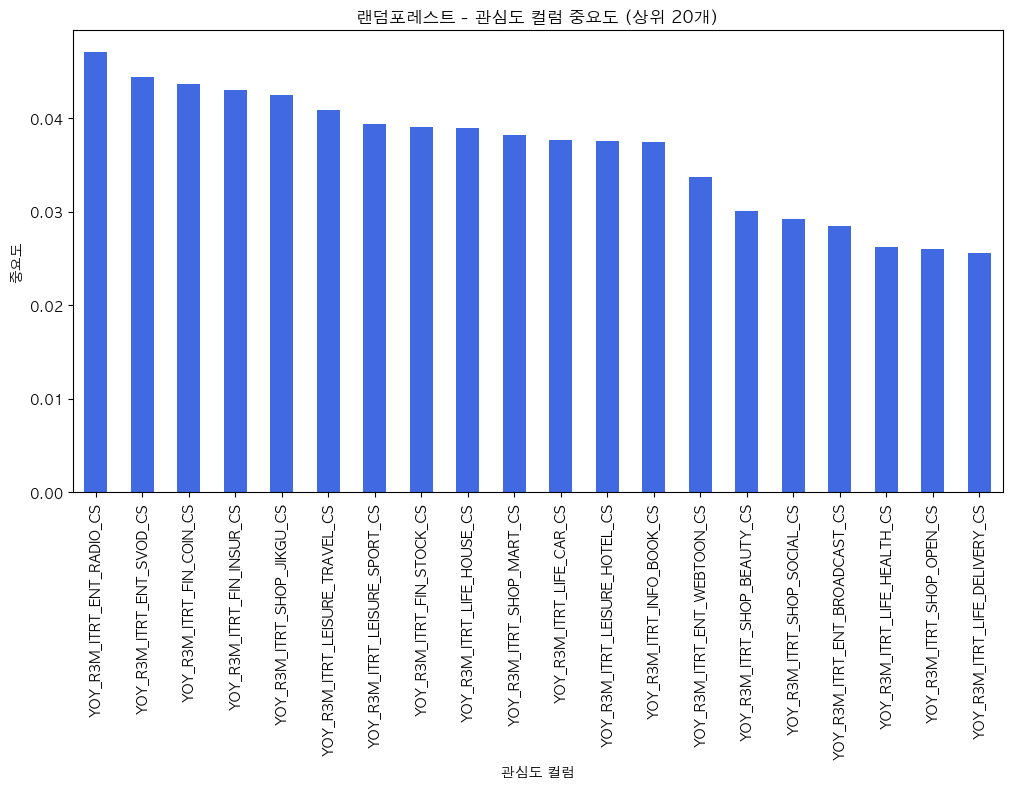

,Importance
YOY_R3M_ITRT_ENT_RADIO_CS,0.047046
YOY_R3M_ITRT_ENT_SVOD_CS,0.044452
YOY_R3M_ITRT_FIN_COIN_CS,0.043660
YOY_R3M_ITRT_FIN_INSUR_CS,0.043032
YOY_R3M_ITRT_SHOP_JIKGU_CS,0.042442
YOY_R3M_ITRT_LEISURE_TRAVEL_CS,0.040907
YOY_R3M_ITRT_LEISURE_SPORT_CS,0.039432
YOY_R3M_ITRT_FIN_STOCK_CS,0.039102
YOY_R3M_ITRT_LIFE_HOUSE_CS,0.039001
YOY_R3M_ITRT_SHOP_MART_CS,0.038211


In [332]:
# 랜덤포레스트 모델 학습 및 평가
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# 랜덤포레스트 평가 결과 출력
print("랜덤포레스트 평가 결과")
print(classification_report(y_test, y_pred_rf))

# 변수 중요도 계산
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# 변수 중요도 상위 20개 시각화
plt.figure(figsize=(12, 6))
feature_importance[:20].plot(kind="bar", color="royalblue")
plt.title("랜덤포레스트 - 관심도 컬럼 중요도 (상위 20개)")
plt.xlabel("관심도 컬럼")
plt.ylabel("중요도")
plt.xticks(rotation=90)
plt.show()

# 데이터프레임 형태로 변수 중요도 출력
importance_df = feature_importance.to_frame(name="Importance")
display(importance_df)


In [320]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# X, y 설정 (CUST_ID 제외, exited를 타겟으로 설정)
X = df_yoy_itrt.drop(columns=["CUST_ID", "exited"])
y = df_yoy_itrt["exited"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE 적용하여 오버샘플링
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 랜덤포레스트 모델 학습 (오버샘플링 데이터 사용)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# 예측 및 평가
y_pred_rf = rf_model.predict(X_test)
print("랜덤포레스트(SMOTE 적용) 평가 결과")
print(classification_report(y_test, y_pred_rf))


랜덤포레스트(SMOTE 적용) 평가 결과
              precision    recall  f1-score   support

           0       0.95      0.71      0.81     53768
           1       0.06      0.30      0.09      3021

    accuracy                           0.68     56789
   macro avg       0.50      0.51      0.45     56789
weighted avg       0.90      0.68      0.77     56789



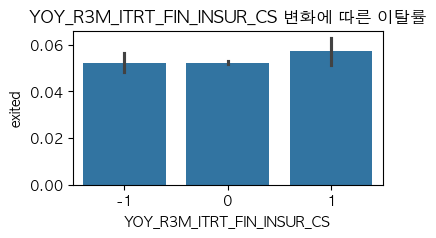

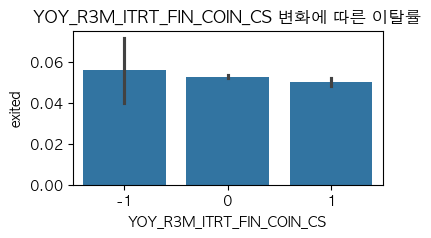

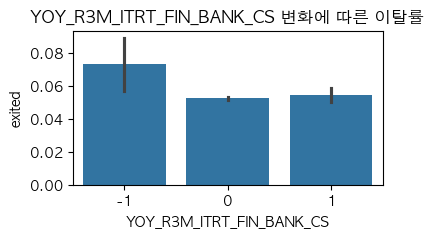

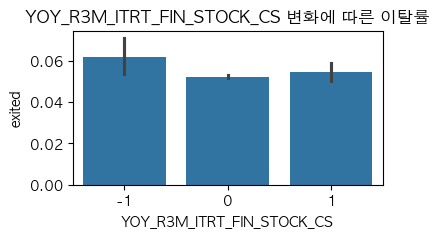

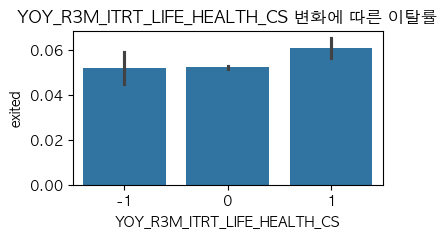

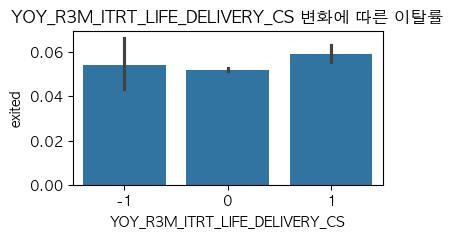

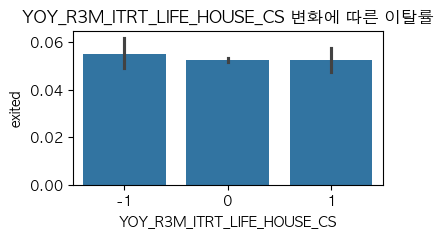

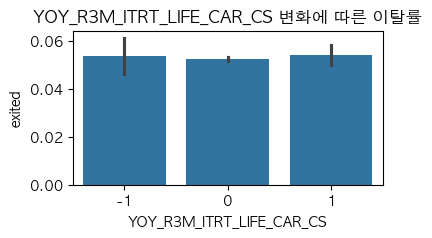

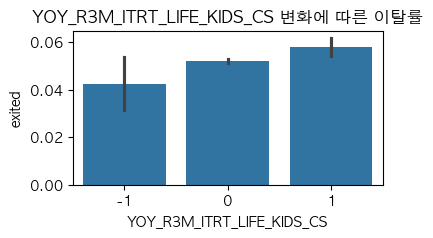

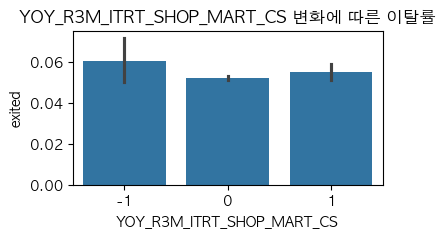

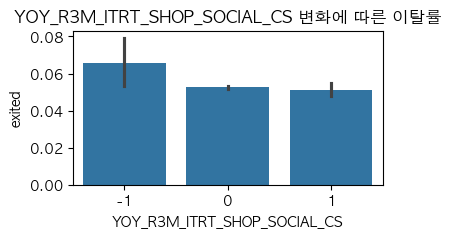

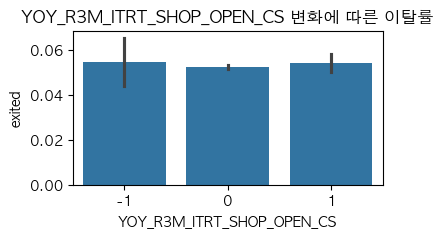

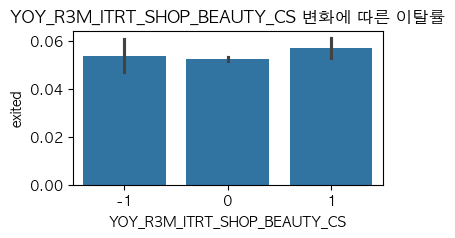

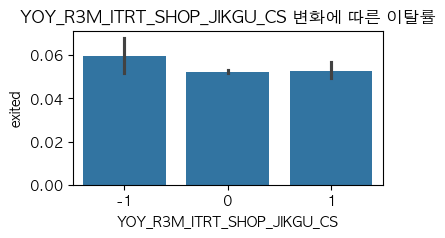

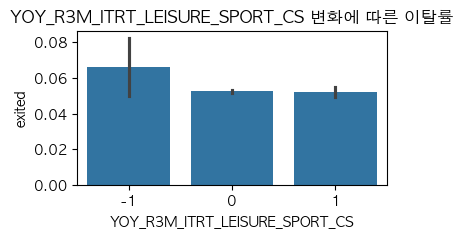

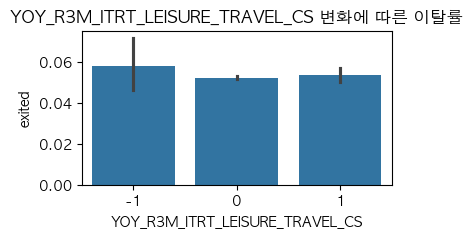

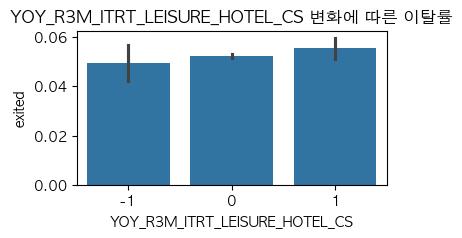

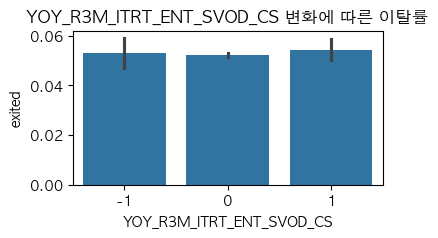

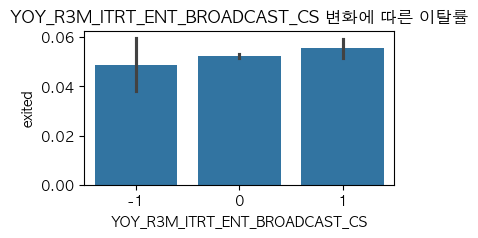

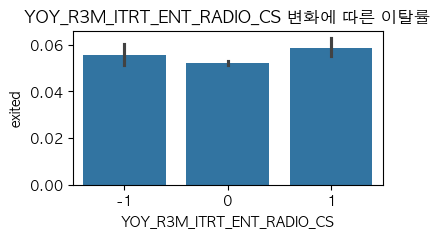

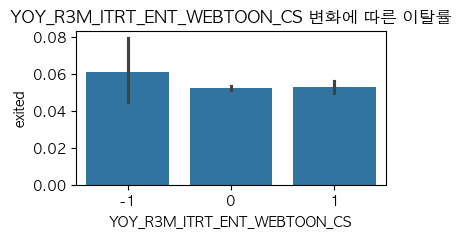

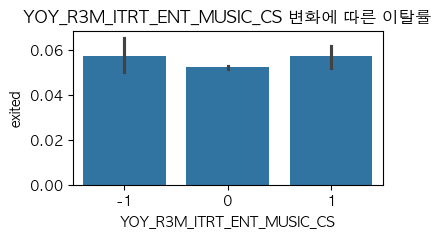

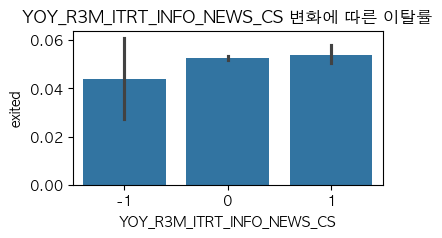

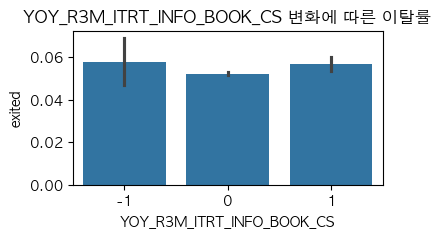

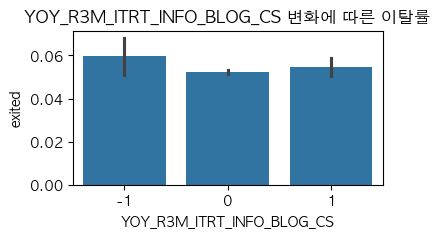

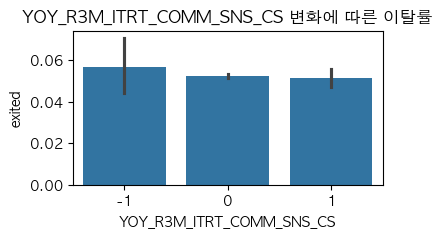

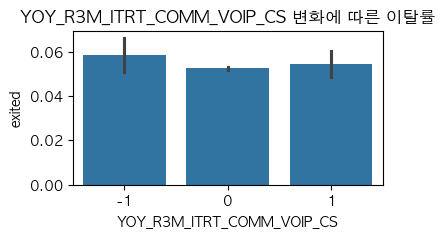

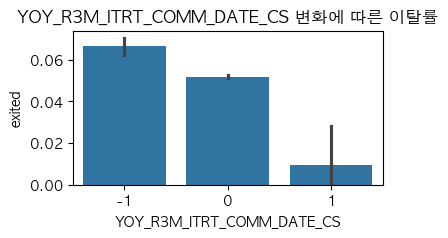

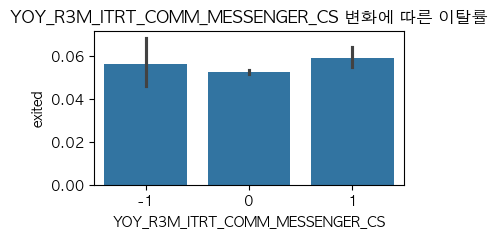

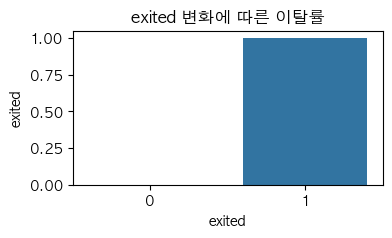

In [335]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in filtered_yoy_col:  # 중요도가 높다고 나온 컬럼만 선택
    plt.figure(figsize=(4, 2))
    sns.barplot(data=df_yoy_itrt, x=col, y="exited")
    plt.title(f"{col} 변화에 따른 이탈률")
    plt.show()


```
YoY 관심도는 R3M보다 이탈 여부를 더 잘 예측하는 요소이긴 함.
하지만 여전히 모델이 높은 성능을 보이지 않음.
즉... 관심도는 이탈여부와 크게 연관지을 수 없다. 
```

/var/folders/x5/jlwsjp6962357zls20s68rnc0000gn/T/ipykernel_19251/4266119633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yoy_itrt["interest_increased"] = (df_yoy_itrt[filtered_yoy_col] > 0).sum(axis=1)


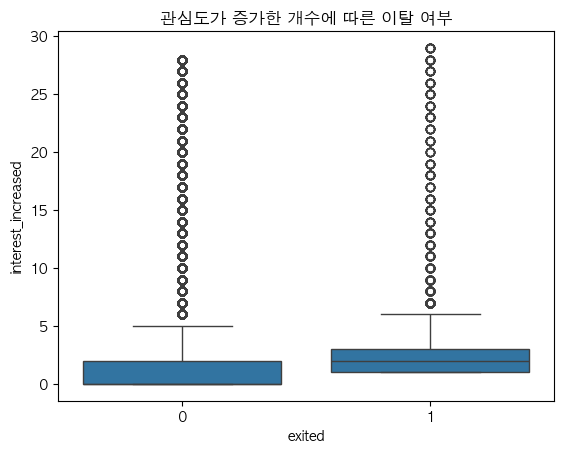

0         1
1         1
3         0
4         0
5         0
         ..
329994    0
329995    0
329996    0
329998    0
329999    0
Name: interest_increased, Length: 283945, dtype: int64


In [354]:
df_yoy_itrt["interest_increased"] = (df_yoy_itrt[filtered_yoy_col] > 0).sum(axis=1)
sns.boxplot(data=df_yoy_itrt, x="exited", y="interest_increased")
plt.title("관심도가 증가한 개수에 따른 이탈 여부")
plt.show()

print(df_yoy_itrt["interest_increased"])
# 두 그룹(exited=0 vs exited=1) 간 중앙값(중앙선)의 차이가 거의 없음
# → 관심도가 증가한 개수가 많다고 해서 이탈률이 높아지는 패턴이 명확하지 않음

/var/folders/x5/jlwsjp6962357zls20s68rnc0000gn/T/ipykernel_19251/1769397048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yoy_itrt["log_interest_increased"] = np.log1p(df_yoy_itrt["interest_increased"])


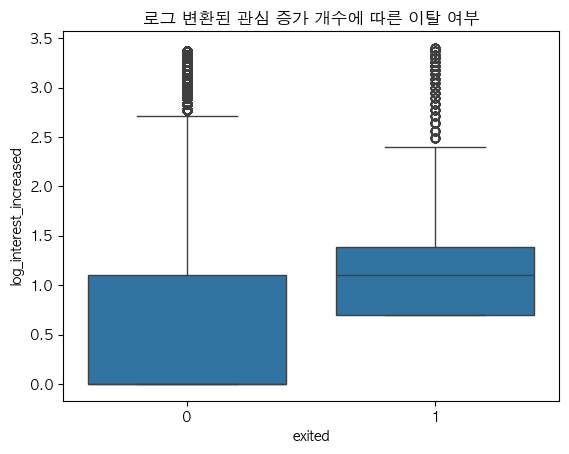

In [342]:
import numpy as np

df_yoy_itrt["log_interest_increased"] = np.log1p(df_yoy_itrt["interest_increased"])
sns.boxplot(data=df_yoy_itrt, x="exited", y="log_interest_increased")
plt.title("로그 변환된 관심 증가 개수에 따른 이탈 여부")
plt.show()


In [344]:
df_yoy_itrt.query("exited != 0")

,CUST_ID,YOY_R3M_ITRT_FIN_PAY_CS,YOY_R3M_ITRT_FIN_INSUR_CS,YOY_R3M_ITRT_FIN_COIN_CS,YOY_R3M_ITRT_FIN_BANK_CS,YOY_R3M_ITRT_FIN_ASSET_CS,YOY_R3M_ITRT_FIN_STOCK_CS,YOY_R3M_ITRT_LIFE_HEALTH_CS,YOY_R3M_ITRT_LIFE_DELIVERY_CS,YOY_R3M_ITRT_LIFE_HOUSE_CS,...,YOY_R3M_ITRT_INFO_BOOK_CS,YOY_R3M_ITRT_INFO_BLOG_CS,YOY_R3M_ITRT_INFO_PORTAL_CS,YOY_R3M_ITRT_COMM_SNS_CS,YOY_R3M_ITRT_COMM_VOIP_CS,YOY_R3M_ITRT_COMM_DATE_CS,YOY_R3M_ITRT_COMM_MESSENGER_CS,exited,interest_increased,log_interest_increased
12,SYN_12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,1,1,0.693147
17,SYN_17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,1,2,1.098612
21,SYN_21,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,-1,0,1,4,1.609438
29,SYN_29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.693147
38,SYN_38,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329822,SYN_329822,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,1.386294
329857,SYN_329857,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.693147
329863,SYN_329863,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,1.386294
329968,SYN_329968,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,5,1.791759


In [352]:
# exited가 1인 데이터만 필터링한 후, filtered_yoy_col 리스트에 포함된 컬럼들의 값이 0이 아닌 경우만 출력
df_filtered = df_yoy_itrt.query("exited == 1").apply(lambda row: row[filtered_yoy_col][row[filtered_yoy_col] != 0], axis=1)

# 결과 출력 (NaN 값 제거 후 보기)
df_filtered.dropna(how='all', inplace=True)  # 모든 값이 NaN인 행 제거
df_filtered.reset_index(drop=True, inplace=True)

# 데이터프레임 출력
print("이탈한 고객의 및 관심도 변화 ≠ 0인 데이터")
print(df_filtered)  # 상위 5개만 출력


이탈한 고객의 및 관심도 변화 ≠ 0인 데이터
       YOY_R3M_ITRT_COMM_DATE_CS  YOY_R3M_ITRT_COMM_MESSENGER_CS  \
0                           -1.0                             NaN   
1                           -1.0                             NaN   
2                           -1.0                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   
...                          ...                             ...   
14903                        NaN                             NaN   
14904                        NaN                             NaN   
14905                        NaN                             NaN   
14906                        NaN                             NaN   
14907                        NaN                             NaN   

       YOY_R3M_ITRT_COMM_SNS_CS  YOY_R3M_ITRT_COMM_VOIP_CS  \
0                           NaN                        NaN   
1                           NaN  

In [360]:
import pandas as pd
# 각 컬럼별 값들이 몇개씩 분리되어있는지 
# 이탈 고객 (exited == 1)만 필터링
df_exited = df_yoy_itrt.query("exited == 1")[filtered_yoy_col]

# 각 컬럼별로 0, 1, -1 개수 세기
value_counts_dict = {}

for col in filtered_yoy_col:
    if col in df_exited.columns:
        value_counts_dict[col] = df_exited[col].value_counts().to_dict()

# 결과 출력
for col, counts in value_counts_dict.items():
    print(f" {col} 값 개수")
    for value, count in sorted(counts.items(), reverse=True):  # 1, 0, -1 순으로 정렬
        print(f"  {value}: {count}개")
    print("-" * 40)


 YOY_R3M_ITRT_FIN_INSUR_CS 값 개수
  1: 377개
  0: 13887개
  -1: 644개
----------------------------------------
 YOY_R3M_ITRT_FIN_COIN_CS 값 개수
  1: 2099개
  0: 12763개
  -1: 46개
----------------------------------------
 YOY_R3M_ITRT_FIN_BANK_CS 값 개수
  1: 642개
  0: 14188개
  -1: 78개
----------------------------------------
 YOY_R3M_ITRT_FIN_STOCK_CS 값 개수
  1: 579개
  0: 14157개
  -1: 172개
----------------------------------------
 YOY_R3M_ITRT_LIFE_HEALTH_CS 값 개수
  1: 742개
  0: 13985개
  -1: 181개
----------------------------------------
 YOY_R3M_ITRT_LIFE_DELIVERY_CS 값 개수
  1: 796개
  0: 14028개
  -1: 84개
----------------------------------------
 YOY_R3M_ITRT_LIFE_HOUSE_CS 값 개수
  1: 418개
  0: 14227개
  -1: 263개
----------------------------------------
 YOY_R3M_ITRT_LIFE_CAR_CS 값 개수
  1: 590개
  0: 14134개
  -1: 184개
----------------------------------------
 YOY_R3M_ITRT_LIFE_KIDS_CS 값 개수
  1: 968개
  0: 13893개
  -1: 47개
----------------------------------------
 YOY_R3M_ITRT_SHOP_MART_CS 값 개수
  1: 646개
  0

In [358]:
import pandas as pd

def count_values_per_column(df, column_list):
    """
    특정 컬럼 리스트에 대해 각 값(0, 1, -1)의 개수를 계산하여 출력하는 함수

    Parameters:
        df (pd.DataFrame): 데이터프레임
        column_list (list): 분석할 컬럼 리스트

    Returns:
        dict: 각 컬럼별 값 개수를 저장한 딕셔너리
    """
    # 이탈 고객 (exited == 1)만 필터링
    df_exited = df.query("exited == 1")[column_list]

    # 각 컬럼별로 0, 1, -1 개수 세기
    value_counts_dict = {}

    for col in column_list:
        if col in df_exited.columns:
            value_counts_dict[col] = df_exited[col].value_counts().to_dict()

    return value_counts_dict

# 함수 실행 예제
result = count_values_per_column(df_yoy_itrt, filtered_yoy_col)

# 결과 출력
for col, counts in result.items():
    print(f"{col} 값 개수")
    for value, count in sorted(counts.items(), reverse=True):  # 1, 0, -1 순으로 정렬
        print(f"  {value}: {count}개")
    print("-" * 40)


YOY_R3M_ITRT_FIN_INSUR_CS 값 개수
  1: 377개
  0: 13887개
  -1: 644개
----------------------------------------
YOY_R3M_ITRT_FIN_COIN_CS 값 개수
  1: 2099개
  0: 12763개
  -1: 46개
----------------------------------------
YOY_R3M_ITRT_FIN_BANK_CS 값 개수
  1: 642개
  0: 14188개
  -1: 78개
----------------------------------------
YOY_R3M_ITRT_FIN_STOCK_CS 값 개수
  1: 579개
  0: 14157개
  -1: 172개
----------------------------------------
YOY_R3M_ITRT_LIFE_HEALTH_CS 값 개수
  1: 742개
  0: 13985개
  -1: 181개
----------------------------------------
YOY_R3M_ITRT_LIFE_DELIVERY_CS 값 개수
  1: 796개
  0: 14028개
  -1: 84개
----------------------------------------
YOY_R3M_ITRT_LIFE_HOUSE_CS 값 개수
  1: 418개
  0: 14227개
  -1: 263개
----------------------------------------
YOY_R3M_ITRT_LIFE_CAR_CS 값 개수
  1: 590개
  0: 14134개
  -1: 184개
----------------------------------------
YOY_R3M_ITRT_LIFE_KIDS_CS 값 개수
  1: 968개
  0: 13893개
  -1: 47개
----------------------------------------
YOY_R3M_ITRT_SHOP_MART_CS 값 개수
  1: 646개
  0: 14150개
 

In [364]:
# 이탈 여부별 평균 관심도 변화 (각 YoY 컬럼에 대해)
def groupby_exited_yoy(df, columns):
    result = df.groupby("exited")[columns].mean()  # exited 기준으로 각 컬럼의 평균값 계산
    return result

df_exited_yes = df.query("exited == 1")[filtered_yoy_col]
# 실행 예시
exited_yes_mean = groupby_exited_yoy(df_exited_yes, filtered_yoy_col)

# 출력
print("이탈고객의 전년 동기 대비 관심도 변화 평균:")
print(exited_yes_mean)


이탈고객의 전년 동기 대비 관심도 변화 평균:
        YOY_R3M_ITRT_FIN_INSUR_CS  YOY_R3M_ITRT_FIN_COIN_CS  \
exited                                                        
1                        -0.01791                  0.137711   

        YOY_R3M_ITRT_FIN_BANK_CS  YOY_R3M_ITRT_FIN_STOCK_CS  \
exited                                                        
1                       0.037832                   0.027301   

        YOY_R3M_ITRT_LIFE_HEALTH_CS  YOY_R3M_ITRT_LIFE_DELIVERY_CS  \
exited                                                               
1                          0.037631                        0.04776   

        YOY_R3M_ITRT_LIFE_HOUSE_CS  YOY_R3M_ITRT_LIFE_CAR_CS  \
exited                                                         
1                         0.010397                  0.027234   

        YOY_R3M_ITRT_LIFE_KIDS_CS  YOY_R3M_ITRT_SHOP_MART_CS  ...  \
exited                                                        ...   
1                        0.061779                   

In [372]:
import pandas as pd

def calculate_ratio_exited(df, column_list, exited_value=1):
    """
    특정 컬럼 리스트에서 0을 제외한 1과 -1의 비율을 계산하는 함수

    Parameters:
        df (pd.DataFrame): 데이터프레임
        column_list (list): 분석할 컬럼 리스트
        exited_value (int): 필터링할 이탈 여부 값 (기본값: 1)

    Returns:
        pd.DataFrame: 각 컬럼별 1과 -1의 비율
    """
    # 특정 exited 값만 필터링 (exited_value는 0 또는 1 가능)
    df_filtered = df.query(f"exited == {exited_value}")[column_list]

    # 각 컬럼별 0을 제외한 1과 -1의 개수 및 비율 계산
    ratio_dict = {}

    for col in column_list:
        if col in df_filtered.columns:
            counts = df_filtered[col].value_counts()
            total_nonzero = counts.get(1, 0) + counts.get(-1, 0)  # 0을 제외한 전체 개수
            if total_nonzero > 0:  # 1 또는 -1이 존재하는 경우만 저장
                ratio_dict[col] = {
                    "1 비율": round(counts.get(1, 0) / total_nonzero, 4),
                    "-1 비율": round(counts.get(-1, 0) / total_nonzero, 4)
                }

    return pd.DataFrame.from_dict(ratio_dict, orient="index")

# 함수 실행 예제 (exited == 1인 경우)
result_ratio_exited_1 = calculate_ratio_exited(df_yoy_itrt, filtered_yoy_col, exited_value=1)

# 함수 실행 예제 (exited == 0인 경우)
result_ratio_exited_0 = calculate_ratio_exited(df_yoy_itrt, filtered_yoy_col, exited_value=0)

# 결과 출력
print("이탈 고객 관심도 변화 비율 (exited == 1)")
print(result_ratio_exited_1)

print("\n잔류 고객 관심도 변화 비율 (exited == 0)")
print(result_ratio_exited_0)

# 이탈고객과 비이탈고객의 관심도 감소,증가 비율은 비슷하다.
# 따라서 관심도로 이탈고객과 비이탈 고객을 구분하는 것은 어려울 것 같다.

이탈 고객 관심도 변화 비율 (exited == 1)
                                  1 비율   -1 비율
YOY_R3M_ITRT_FIN_INSUR_CS       0.3692  0.6308
YOY_R3M_ITRT_FIN_COIN_CS        0.9786  0.0214
YOY_R3M_ITRT_FIN_BANK_CS        0.8917  0.1083
YOY_R3M_ITRT_FIN_STOCK_CS       0.7710  0.2290
YOY_R3M_ITRT_LIFE_HEALTH_CS     0.8039  0.1961
YOY_R3M_ITRT_LIFE_DELIVERY_CS   0.9045  0.0955
YOY_R3M_ITRT_LIFE_HOUSE_CS      0.6138  0.3862
YOY_R3M_ITRT_LIFE_CAR_CS        0.7623  0.2377
YOY_R3M_ITRT_LIFE_KIDS_CS       0.9537  0.0463
YOY_R3M_ITRT_SHOP_MART_CS       0.8522  0.1478
YOY_R3M_ITRT_SHOP_SOCIAL_CS     0.8810  0.1190
YOY_R3M_ITRT_SHOP_OPEN_CS       0.8756  0.1244
YOY_R3M_ITRT_SHOP_BEAUTY_CS     0.7686  0.2314
YOY_R3M_ITRT_SHOP_JIKGU_CS      0.7956  0.2044
YOY_R3M_ITRT_LEISURE_SPORT_CS   0.9518  0.0482
YOY_R3M_ITRT_LEISURE_TRAVEL_CS  0.9204  0.0796
YOY_R3M_ITRT_LEISURE_HOTEL_CS   0.7719  0.2281
YOY_R3M_ITRT_ENT_SVOD_CS        0.6816  0.3184
YOY_R3M_ITRT_ENT_BROADCAST_CS   0.9091  0.0909
YOY_R3M_ITRT_ENT_RADIO_CS     

이탈 고객과 잔류 고객의 관심도 변화 비율이 거의 비슷함

특정 관심도 변화(1 증가, -1 감소)의 비율이 exited=1(이탈)과 exited=0(잔류)에서 큰 차이를 보이지 않음.
예를 들어, YOY_R3M_ITRT_FIN_COIN_CS의 경우 이탈 고객(0.9786)과 잔류 고객(0.9809)의 1 비율이 거의 동일함.
마찬가지로 대부분의 변수에서 두 그룹 간 차이가 크지 않음.
이탈 고객의 관심도 변화 패턴이 일관되지 않음

만약 관심도 변화가 이탈 여부를 결정하는 중요한 요인이었다면, 특정 관심도에서 이탈 고객과 잔류 고객의 차이가 뚜렷해야 함.
하지만 지금까지 나온 결과에서는 관심도의 변화가 이탈을 유발하는 확실한 패턴을 보여주지 않음.
머신러닝 모델에서도 낮은 예측력

로지스틱 회귀 및 랜덤포레스트 모델에서도 exited 예측력이 낮았음.
변수 중요도를 보았을 때도, 관심도 변화(YoY)가 이탈 여부에 강한 영향을 주는 변수가 아님.
특히, F1-score와 recall 값이 낮아 실제 이탈 고객을 잘 예측하지 못했음.